In [256]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import pycountry

pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("Dataset/Series9700.csv")

In [3]:
df.sample()

,Unnamed: 0,Title,Synopsis,Tagline,Genero,Rating,Popularity,Vote Count,Vote Average,Original Language,Origin Country,First Air Date,Last Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Production Companies,Where to Watch,Reviews,Budget,Revenue,Cast,Creators,Poster,Trailer
7718,7718,The Flight Attendant,Flight attendant Cassandra Bowden wakes in her...,The woman who knew too much.,"Drama, Mystery, Comedy",7.173,54.815,541,7.173,en,US,2020-11-26,NaN,False,Canceled,2,16,0.0,"Yes, Norman Productions, Warner Bros. Televisi...","Strim, Neon TV, Movistar Plus+ Ficción Total ,...",No reviews,No data available,No data available,"Kaley Cuoco, Zosia Mamet, Deniz Akdeniz, Mo Mc...",Steve Yockey,https://image.tmdb.org/t/p/w500/oCK0o8CWV46Z0P...,No trailer available


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9695 entries, 0 to 9694
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            9695 non-null   int64  
 1   Title                 9695 non-null   object 
 2   Synopsis              8073 non-null   object 
 3   Tagline               1448 non-null   object 
 4   Genero                9161 non-null   object 
 5   Rating                9695 non-null   float64
 6   Popularity            9695 non-null   float64
 7   Vote Count            9695 non-null   int64  
 8   Vote Average          9695 non-null   float64
 9   Original Language     9695 non-null   object 
 10  Origin Country        9695 non-null   object 
 11  First Air Date        9662 non-null   object 
 12  Last Air Date         0 non-null      float64
 13  In production         9695 non-null   bool   
 14  Status                9695 non-null   object 
 15  Number of Season     

In [5]:
df.drop(columns = ["Unnamed: 0", "Tagline", "Vote Average","Last Air Date", "Production Companies","Revenue", "Budget", "Creators"], inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9695 entries, 0 to 9694
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               9695 non-null   object 
 1   Synopsis            8073 non-null   object 
 2   Genero              9161 non-null   object 
 3   Rating              9695 non-null   float64
 4   Popularity          9695 non-null   float64
 5   Vote Count          9695 non-null   int64  
 6   Original Language   9695 non-null   object 
 7   Origin Country      9695 non-null   object 
 8   First Air Date      9662 non-null   object 
 9   In production       9695 non-null   bool   
 10  Status              9695 non-null   object 
 11  Number of Season    9695 non-null   int64  
 12  Number of Episodes  9695 non-null   int64  
 13  Episode Duration    9695 non-null   float64
 14  Where to Watch      9695 non-null   object 
 15  Reviews             9695 non-null   object 
 16  Cast  

In [7]:
df["release_year"]= df["First Air Date"].str.extract(r"(\d{4})")[0]
# de mi df creo una columna que solo es el año de release

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9695 entries, 0 to 9694
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               9695 non-null   object 
 1   Synopsis            8073 non-null   object 
 2   Genero              9161 non-null   object 
 3   Rating              9695 non-null   float64
 4   Popularity          9695 non-null   float64
 5   Vote Count          9695 non-null   int64  
 6   Original Language   9695 non-null   object 
 7   Origin Country      9695 non-null   object 
 8   First Air Date      9662 non-null   object 
 9   In production       9695 non-null   bool   
 10  Status              9695 non-null   object 
 11  Number of Season    9695 non-null   int64  
 12  Number of Episodes  9695 non-null   int64  
 13  Episode Duration    9695 non-null   float64
 14  Where to Watch      9695 non-null   object 
 15  Reviews             9695 non-null   object 
 16  Cast  

In [9]:
# convierto la fecha a formato datetime
df["First Air Date"] = pd.to_datetime(df["First Air Date"], errors='coerce')

In [10]:
# miramos los nulos
def calculate_null_percentage(data):
    null_percentage = round(data.isna().sum() / len(data) * 100, 4)
    nulls_df = pd.DataFrame(null_percentage).reset_index()
    nulls_df.columns = ['header_name', 'percent_nulls']
    return nulls_df

In [11]:
calculate_null_percentage(df) # sinopsis, genero, first air date, cast

,header_name,percent_nulls
0,Title,0.0000
1,Synopsis,16.7303
2,Genero,5.5080
3,Rating,0.0000
4,Popularity,0.0000
5,Vote Count,0.0000
6,Original Language,0.0000
7,Origin Country,0.0000
8,First Air Date,0.3404
9,In production,0.0000


In [12]:
df["Synopsis"].isna().sum() # me interesa para el sentiment analysis

1622

In [13]:
df["Genero"].isna().sum()  # me interesa para el analisis del genero, no elimino los nans porque tienen información relevante en otras columnas

534

In [14]:
df[df["Genero"].isna()] # los nans de genero tienen los actores y alguna plataforma así que de momento no los elimino

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
9,Ich bin ein Star – Holt mich hier raus! Die St...,NaN,NaN,4.5,1888.810,2,de,DE,2018-01-20,True,Returning Series,7,111,65.0,RTL+,No reviews,"Angela Finger-Erben, Olivia Jones",https://image.tmdb.org/t/p/w500/eYWSdyNtIFk6yL...,No trailer available,2018
75,Pauw & Witteman,Pauw & Witteman is a Dutch late-night talk sho...,NaN,7.0,896.476,1,nl,NL,2006-09-04,False,Ended,8,642,50.0,NLZIET,No reviews,"Jeroen Pauw, Paul Witteman",https://image.tmdb.org/t/p/w500/dXEuVWU3ZaY9iK...,No trailer available,2006
94,Xplay,Xplay (previously GameSpot TV and Extended Pla...,NaN,8.5,819.947,2,en,US,1998-07-04,True,Returning Series,9,632,30.0,No platforms available,No reviews,"Kristin Adams, Morgan Webb, Adam Sessler, Kate...",https://image.tmdb.org/t/p/w500/7ynD7g4U9hOODu...,https://www.youtube.com/watch?v=7UQLGzUl6iM,1998
146,TMZ Live,This hourlong show is an edited version of the...,NaN,2.0,689.913,1,en,US,2012-06-11,True,Returning Series,2,261,44.0,No platforms available,No reviews,"Harvey Levin, Charles Latibeaudiere",https://image.tmdb.org/t/p/w500/12sC6lRA7ds448...,No trailer available,2012
153,Cutie Pie,NaN,NaN,4.0,679.843,1,ko,KR,2010-03-22,False,Ended,1,138,35.0,No platforms available,No reviews,"Chae Sang-woo, Ye Ji-won, Lee Young-yoo, Kim S...",https://image.tmdb.org/t/p/w500/5tIDxlcWjkVgta...,No trailer available,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9620,Holland Sport,NaN,NaN,0.0,45.161,0,en,NL,2003-10-19,False,Ended,9,231,50.0,NLZIET,No reviews,Matthijs van Nieuwkerk,https://image.tmdb.org/t/p/w500None,No trailer available,2003
9623,Portia Faces Life,Portia Faces Life was heard on radio from 1940...,NaN,1.0,45.147,1,en,US,1954-04-05,False,Ended,2,324,15.0,No platforms available,No reviews,"Mark Miller, Frances Reid, Donald Woods, Karl ...",https://image.tmdb.org/t/p/w500None,No trailer available,1954
9637,The Ten Assassinations,NaN,NaN,0.0,45.073,0,cn,HK,1976-08-30,False,Ended,1,50,0.0,No platforms available,No reviews,"Pat Poon, Tsui Siu-Ming, David Lau Chi-Wing, S...",https://image.tmdb.org/t/p/w500/1mdk1SouPU4Y1X...,No trailer available,1976
9661,さくら心中,NaN,NaN,0.0,44.985,0,ja,JP,2011-01-05,True,Returning Series,1,63,0.0,Hulu,No reviews,"Yûko Fueki, Hidenori Tokuyama, Kenji Matsuda, ...",https://image.tmdb.org/t/p/w500/sZhrITByVizZxg...,No trailer available,2011


In [15]:
df["release_year"].isna().sum()

33

In [16]:
df[df["release_year"].isna()]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
1073,Your Hand in Mine,Your Hand In Mine was a long-running drama tha...,"Family, Soap",0.0,218.688,0,zh,SG,NaT,False,Ended,1,180,45.0,No platforms available,No reviews,"Huang Wenyong, Chen Liping, Yvonne Lim, Shaun ...",https://image.tmdb.org/t/p/w500/syn1uYvWTiWOAD...,No trailer available,NaN
1294,Balamory,Live action series for pre-school children bas...,Kids,7.0,194.555,11,en,GB,NaT,False,Canceled,4,247,20.0,Sky Go,No reviews,"Kim Tserkezie, Julie Wilson Nimmo, Andrew Agne...",https://image.tmdb.org/t/p/w500/4VsmfEJPZ1IrAU...,No trailer available,NaN
1478,Cinema Insomnia,Cinema Insomnia is a nationally syndicated Ame...,Comedy,0.0,179.998,0,en,US,NaT,True,Returning Series,8,112,0.0,No platforms available,No reviews,Mister Lobo,https://image.tmdb.org/t/p/w500None,No trailer available,NaN
1712,Highly Questionable,Lively sports commentary with a rotating cast ...,Talk,10.0,164.918,1,en,US,NaT,False,Ended,11,784,22.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/eRM3Uh3Sp612nE...,No trailer available,NaN
1898,Molto Mario,NaN,Documentary,0.0,154.382,0,en,US,NaT,False,Canceled,9,382,30.0,No platforms available,No reviews,Mario Batali,https://image.tmdb.org/t/p/w500None,No trailer available,NaN
3204,厕所的花子VS倔强驱魔师 汉语 (zh-CN),NaN,NaN,0.0,107.341,0,zh,CN,NaT,True,Returning Series,1,1,0.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500None,No trailer available,NaN
3693,Sugoi Japan,NaN,Documentary,0.0,96.277,0,th,TH,NaT,True,Returning Series,1,229,30.0,No platforms available,No reviews,Hiro Sano,https://image.tmdb.org/t/p/w500/ohKzh4mfUNqtcz...,No trailer available,NaN
3695,Kidspace,NaN,NaN,0.0,96.265,0,en,US,NaT,True,Returning Series,5,65,30.0,No platforms available,No reviews,Ereka Vetrini,https://image.tmdb.org/t/p/w500None,No trailer available,NaN
3888,Heartland Bowhunter,Heartland Bowhunter documents the adventures o...,Documentary,0.0,93.025,0,en,No data available,NaT,True,In Production,16,209,0.0,No platforms available,No reviews,"Michael Hunsucker, Shawn Luchtel",https://image.tmdb.org/t/p/w500/vqRW9J2b96OeZM...,https://www.youtube.com/watch?v=6-cagn1nM70,NaN
3964,The People's Court,The People's Court is an American arbitration-...,"Reality, Crime",6.8,91.640,18,en,US,NaT,True,Returning Series,26,1255,44.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/oHGpB5zv3CGar9...,No trailer available,NaN


In [17]:
# elimino las series que no tienen release_year, son solo 33
df.dropna(subset= ["release_year"], inplace=True)

In [18]:
df["release_year"] = df["release_year"].astype(int)

In [19]:
df.info() # me quedo con 9662 filas

<class 'pandas.core.frame.DataFrame'>
Index: 9662 entries, 0 to 9694
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               9662 non-null   object        
 1   Synopsis            8048 non-null   object        
 2   Genero              9136 non-null   object        
 3   Rating              9662 non-null   float64       
 4   Popularity          9662 non-null   float64       
 5   Vote Count          9662 non-null   int64         
 6   Original Language   9662 non-null   object        
 7   Origin Country      9662 non-null   object        
 8   First Air Date      9662 non-null   datetime64[ns]
 9   In production       9662 non-null   bool          
 10  Status              9662 non-null   object        
 11  Number of Season    9662 non-null   int64         
 12  Number of Episodes  9662 non-null   int64         
 13  Episode Duration    9662 non-null   float64       
 1

In [20]:
# hay columnas que no tienen nulos pero muchos de sus valores son NO DATA AVAILABLE, NO REVIEWS, NO PLATFORMS ETC.
# todavía no elimino las columnas con demasiados nulos porque voy a usar sus valores 
# para compararlos con los valores de mi dataset de 9700 filas

### ORIGINAL LANGUAGE

In [21]:
df["Original Language"].value_counts(dropna=False)

Original Language
en    2836
ja    1925
zh    1050
ko     846
es     472
de     333
fr     253
pt     243
tl     193
cn     190
ru     189
hi     169
tr     134
nl     101
ar      95
el      89
he      59
it      51
th      50
pl      49
cs      40
sv      31
no      24
da      22
id      19
sk      18
af      17
hu      16
ur      14
bn      14
fi      14
ka      10
ro       9
sr       8
bg       8
ta       8
fa       7
ca       7
uk       7
hr       6
lt       6
te       3
kn       3
ms       3
kk       3
et       2
ab       2
mr       2
or       1
ga       1
sh       1
eu       1
cy       1
gl       1
mo       1
sl       1
mk       1
ml       1
as       1
lv       1
Name: count, dtype: int64

In [22]:
def get_language(codigo):
    try:
        language = pycountry.languages.get(alpha_2= codigo)
        return language.name if language else codigo
    except KeyError:
        return codigo

In [23]:
df["Original Language"] = df["Original Language"].apply(get_language)

In [24]:
vals=pd.DataFrame(df["Original Language"].value_counts())

In [25]:
vals.reset_index(inplace=True)
vals

,Original Language,count
0,English,2836
1,Japanese,1925
2,Chinese,1050
3,Korean,846
4,Spanish,472
5,German,333
6,French,253
7,Portuguese,243
8,Tagalog,193
9,cn,190


In [26]:
# de 10 series para abajo lo agrupo en "otros" idiomas
group_languages_df=vals[vals["count"]<10]
group_languages=list(group_languages_df["Original Language"])

In [27]:
def clean_country(x):
    if x in group_languages:
        return "Other"
    else: 
        return x 

In [28]:
df["Original Language"]=list(map(clean_country, df["Original Language"]))

In [29]:
df["Original Language"].nunique()

33

In [30]:
df["Original Language"].value_counts(dropna=False)

Original Language
English                 2836
Japanese                1925
Chinese                 1050
Korean                   846
Spanish                  472
German                   333
French                   253
Portuguese               243
Tagalog                  193
cn                       190
Russian                  189
Hindi                    169
Turkish                  134
Dutch                    101
Other                     96
Arabic                    95
Modern Greek (1453-)      89
Hebrew                    59
Italian                   51
Thai                      50
Polish                    49
Czech                     40
Swedish                   31
Norwegian                 24
Danish                    22
Indonesian                19
Slovak                    18
Afrikaans                 17
Hungarian                 16
Finnish                   14
Bengali                   14
Urdu                      14
Georgian                  10
Name: count, dtype: int64

In [31]:
# quiero averiguar que es el codigo cn
df[df["Original Language"]== "cn"] # cn son todas series de Hong Kong

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
36,HK 80's,This sitcom series premiered in 1981 and chan...,"Comedy, Drama, Family",0.000,1159.635,0,cn,HK,1981-06-08,False,Ended,6,1310,0.0,No platforms available,No reviews,"Wong San, Leung Bo-Ching, Leung Chung-Fun, Joh...",https://image.tmdb.org/t/p/w500/6IpuLrhh7XZfIv...,No trailer available,1981
56,A Kindred Spirit,A Kindred Spirit was a television drama series...,"Drama, Comedy",0.000,1015.575,0,cn,HK,1995-05-15,False,Ended,1,1128,40.0,No platforms available,No reviews,"Louise Lee Si-Kei, Lau Dan, Ram Chiang Chi-Kwo...",https://image.tmdb.org/t/p/w500/fpOAhBePSowxPs...,No trailer available,1995
88,Come Home Love: Lo and Behold,"Hung Sue Gan starting from the bottom, establi...","Family, Comedy, Drama",5.357,842.687,42,cn,HK,2017-02-06,True,Returning Series,1,2460,22.0,No platforms available,No reviews,"Lau Dan, Angela Tong Ying-Ying, Koni Lui, Pal ...",https://image.tmdb.org/t/p/w500/lgD4j9gUGmMckZ...,No trailer available,2017
133,Come Home Love,"MA FU, a retired employee of the HK Correction...","Comedy, Drama, Family",8.000,716.799,1,cn,HK,2012-05-14,False,Ended,2,995,0.0,No platforms available,No reviews,"Quinn Ho, Louis Cheung, Priscilla Wong, Owen C...",https://image.tmdb.org/t/p/w500/nQwKCmgbpjb3wI...,No trailer available,2012
201,Mind Our Own Business,"The frugal and harsh father, CHENG SAM, and th...","Family, Soap",0.000,596.746,0,cn,HK,1993-05-10,False,Ended,1,319,0.0,No platforms available,No reviews,"Michelle Yim, Waise Lee Chi-Hung, Esther Kwan ...",https://image.tmdb.org/t/p/w500/ote6nMem0bXPr9...,No trailer available,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9569,"Mythical Crane, Magic Needle '92",NaN,"Action & Adventure, Drama",6.000,45.312,1,cn,HK,1992-11-16,False,Ended,1,30,0.0,No platforms available,No reviews,"Michelle Yim, Kingdom Yuen King-Tan, Eric Wan ...",https://image.tmdb.org/t/p/w500/4ukQCa0m6R4bZK...,No trailer available,1992
9593,Blowing in the Wind,Brothers Bo and Wei are forced to join the tri...,Drama,0.000,45.230,0,cn,HK,1980-05-12,False,Ended,1,80,0.0,No platforms available,No reviews,"Chen Kuan-Tai, Kong Hon, Violet Lee Ying, Iris...",https://image.tmdb.org/t/p/w500/rsdk2q1dXue2L8...,No trailer available,1980
9611,The Ghetto-Fabulous Lady,A woman who went from rags to riches after mar...,"Crime, Mystery",0.000,45.186,0,cn,HK,2019-02-25,False,Ended,1,25,43.0,No platforms available,No reviews,"Nadia Chan Chung-Ling, Alice Chan Wai, Tsui Wi...",https://image.tmdb.org/t/p/w500/oK4QnAkwjLoJTG...,No trailer available,2019
9630,Conflict,"Conflict is a TVB television series, premiered...",Drama,0.000,45.116,0,cn,HK,1978-10-02,False,Ended,1,85,45.0,No platforms available,No reviews,"Chow Yun-Fat, Angie Chiu Nga-Chi, Shek Sau, Ka...",https://image.tmdb.org/t/p/w500/aEPzRfftgeZ0MS...,No trailer available,1978


In [32]:
df.loc[df["Original Language"]== "cn", "Original Language"]= "Cantonese"

In [33]:
df.loc[df["Original Language"]== "Modern Greek (1453-)", "Original Language"]= "Greek"

### ORIGIN COUNTRY

Hago lo mismo con el País de origen

In [34]:
df["Origin Country"].value_counts(dropna=False)

Origin Country
US                1972
JP                1918
CN                 943
KR                 828
GB                 463
                  ... 
FR, IN               1
BE, FR, US           1
GB, IE               1
US, VE, MX           1
US, BE, FR, CA       1
Name: count, Length: 225, dtype: int64

In [35]:
df["Origin Country"].isna().sum() 

0

In [36]:
df["Origin Country"] = df["Origin Country"].str.split(",").str[0] # separo los Países por comas y me quedo con el primero

In [37]:
df["Origin Country"].value_counts(dropna=False)

Origin Country
US    2017
JP    1931
CN     959
KR     834
GB     484
      ... 
DO       1
KP       1
XC       1
LV       1
CM       1
Name: count, Length: 85, dtype: int64

In [38]:
df[df["Origin Country"]== "No data available"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
185,Hometown Over the Hill,By depicting the dreams of people living in fa...,"Drama, Family, Sci-Fi & Fantasy",0.0,618.715,0,Korean,No data available,2007-10-24,False,Ended,2,336,60.0,No platforms available,No reviews,"Woo Hee-jin, Kim Chang-sook, Seo Tae-hwa, Lee ...",https://image.tmdb.org/t/p/w500/wKwEQ2sfHCGLGK...,No trailer available,2007
378,Common Knowledge,Game show about common knowledge hosted by Joe...,NaN,7.0,402.982,1,English,No data available,2019-01-14,False,Ended,3,261,22.0,No platforms available,No reviews,Joey Fatone,https://image.tmdb.org/t/p/w500/jj6nNtSg3C0dD5...,No trailer available,2019
484,Asa ga Kita,"Towards the end of the Edo era, in the town of...",Drama,8.0,356.471,2,Japanese,No data available,2015-09-28,False,Ended,1,156,15.0,No platforms available,No reviews,"Haru, Hiroshi Tamaki, Aoi Miyazaki, Dean Fujio...",https://image.tmdb.org/t/p/w500/wNx40I5mkvowLd...,No trailer available,2015
512,Himawari,NaN,Drama,8.0,345.059,1,Japanese,No data available,1996-04-01,False,Ended,1,162,15.0,No platforms available,No reviews,"Nanako Matsushima, Mari Natsuki, Shiho Fujimur...",https://image.tmdb.org/t/p/w500/jf1ZCHqCXZEwK3...,No trailer available,1996
513,Die Montagsmaler,NaN,Reality,0.0,343.932,0,German,No data available,1974-01-14,False,Canceled,6,285,0.0,No platforms available,No reviews,Guido Cantz,https://image.tmdb.org/t/p/w500/4XTSuukIkXpWKQ...,No trailer available,1974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9306,Ταύρος με Τοξότη,NaN,Comedy,7.0,46.366,1,Greek,No data available,1994-09-16,False,Ended,1,32,0.0,No platforms available,No reviews,"Giannis Vouros, Peggy Stathakopoulou, Dimitris...",https://image.tmdb.org/t/p/w500/tsKIYdSFWE2dvh...,No trailer available,1994
9317,A Walk To Happiness,NaN,NaN,0.0,46.334,0,Chinese,No data available,2013-09-04,False,Ended,1,31,45.0,No platforms available,No reviews,"Zhao Huinan, Yao Qianyu, Li Jiaxuan, Jiang Cha...",https://image.tmdb.org/t/p/w500/c0hkXA5YmfwxWo...,No trailer available,2013
9557,푸른거탑 - 롤러코스터2,NaN,Comedy,0.0,45.381,0,Korean,No data available,2012-04-29,False,Ended,1,27,0.0,No platforms available,No reviews,"Choi Jong-hoon, Kim Jae-woo, Kim Ho-chang, Bae...",https://image.tmdb.org/t/p/w500None,No trailer available,2012
9564,Show Offs,The Show Offs are a troupe of long-form improv...,NaN,4.0,45.342,2,English,No data available,2019-03-18,True,Returning Series,3,33,0.0,No platforms available,No reviews,"Casey Jost, Lisa Valentine Clark",https://image.tmdb.org/t/p/w500/7nDl0ZAks2mxWW...,No trailer available,2019


In [39]:
def asignar_pais_por_idioma(fila):
    idioma_pais = {"English": "US",
        "Korean": "KR",
        "Japanese": "JP",
        "Spanish": "ES",
        "French": "FR",
        "German": "DE",
        "Chinese": "CN",
        "Greek": "GR",
        "Russian": "RU",
        "Slovak":"SK",
        "Hungarian":"HU",
        "Turkish":"TR",
        "Thai":"TH",
        "Portuguese":"BR"}
    # Si el país es "no data available" asignamos el país según el idioma
    if fila["Origin Country"] == "No data available":
        return idioma_pais.get(fila["Original Language"])
    else:
        return fila["Origin Country"]  # Si ya tiene un país, lo mantiene

In [40]:
df["Origin Country"] = df.apply(asignar_pais_por_idioma, axis=1)


In [41]:
pd.set_option("display.max_rows", None)

In [42]:
df["Origin Country"].value_counts(dropna=False)

Origin Country
US      2038
JP      1935
CN       966
KR       848
GB       484
DE       307
CA       262
IN       195
PH       195
HK       194
BR       189
RU       181
FR       160
MX       153
TR       135
ES       100
GR        88
TW        79
AU        78
CL        67
NL        66
EG        64
PT        59
CO        54
IT        52
IL        52
TH        50
BE        50
PL        49
AR        48
CZ        41
VE        32
SE        30
DK        25
ZA        24
NO        24
AT        22
ID        19
SK        17
HU        16
FI        15
PK        14
None      14
UA        13
SG        11
IE        10
GE        10
RO        10
NZ         9
LB         8
IO         8
BG         7
IR         7
SY         7
LT         6
HR         6
RS         6
PE         5
MY         5
CH         4
SU         3
SA         3
MA         3
KZ         3
AE         2
QA         2
EE         2
PR         2
CY         2
BD         2
DO         1
BA         1
XC         1
LV         1
YU         1
EC        

In [43]:
df.dropna(subset="Origin Country", inplace =True)

In [44]:
df["Origin Country"].nunique() # me interesan los paises por si quiero hacer visualización en un mapa

84

In [45]:
def country_name(sigla):
    try:
        country = pycountry.countries.get(alpha_2 = sigla)
        return country.name if country else sigla
    except KeyError:
        return sigla

In [46]:
df["Origin Country"] = df["Origin Country"].apply(country_name)

In [47]:
df["Origin Country"].value_counts()

Origin Country
United States                             2038
Japan                                     1935
China                                      966
Korea, Republic of                         848
United Kingdom                             484
Germany                                    307
Canada                                     262
India                                      195
Philippines                                195
Hong Kong                                  194
Brazil                                     189
Russian Federation                         181
France                                     160
Mexico                                     153
Türkiye                                    135
Spain                                      100
Greece                                      88
Taiwan, Province of China                   79
Australia                                   78
Chile                                       67
Netherlands                                 6

In [48]:
# elimino también los paises SU, YU, XC y XG
df = df[df["Origin Country"].isin(["SU", "YU", "XC", "XG"])== False]

In [49]:
df["Origin Country"].value_counts()

Origin Country
United States                             2038
Japan                                     1935
China                                      966
Korea, Republic of                         848
United Kingdom                             484
Germany                                    307
Canada                                     262
India                                      195
Philippines                                195
Hong Kong                                  194
Brazil                                     189
Russian Federation                         181
France                                     160
Mexico                                     153
Türkiye                                    135
Spain                                      100
Greece                                      88
Taiwan, Province of China                   79
Australia                                   78
Chile                                       67
Netherlands                                 6

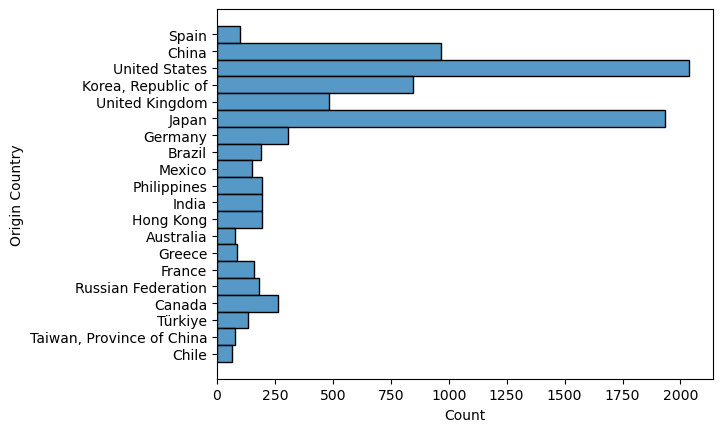

In [50]:
top_20_paises = df["Origin Country"].value_counts().head(20).index
df_top_20 = df[df["Origin Country"].isin(top_20_paises)]
sns.histplot(data=df_top_20, y="Origin Country", discrete=True)
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9642 entries, 0 to 9694
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               9642 non-null   object        
 1   Synopsis            8035 non-null   object        
 2   Genero              9121 non-null   object        
 3   Rating              9642 non-null   float64       
 4   Popularity          9642 non-null   float64       
 5   Vote Count          9642 non-null   int64         
 6   Original Language   9642 non-null   object        
 7   Origin Country      9642 non-null   object        
 8   First Air Date      9642 non-null   datetime64[ns]
 9   In production       9642 non-null   bool          
 10  Status              9642 non-null   object        
 11  Number of Season    9642 non-null   int64         
 12  Number of Episodes  9642 non-null   int64         
 13  Episode Duration    9642 non-null   float64       
 1

In [52]:
num = ["Rating", "Popularity", "Vote Count", "Number of Season", "Number of Episodes", "Episode Duration", "release_year"]

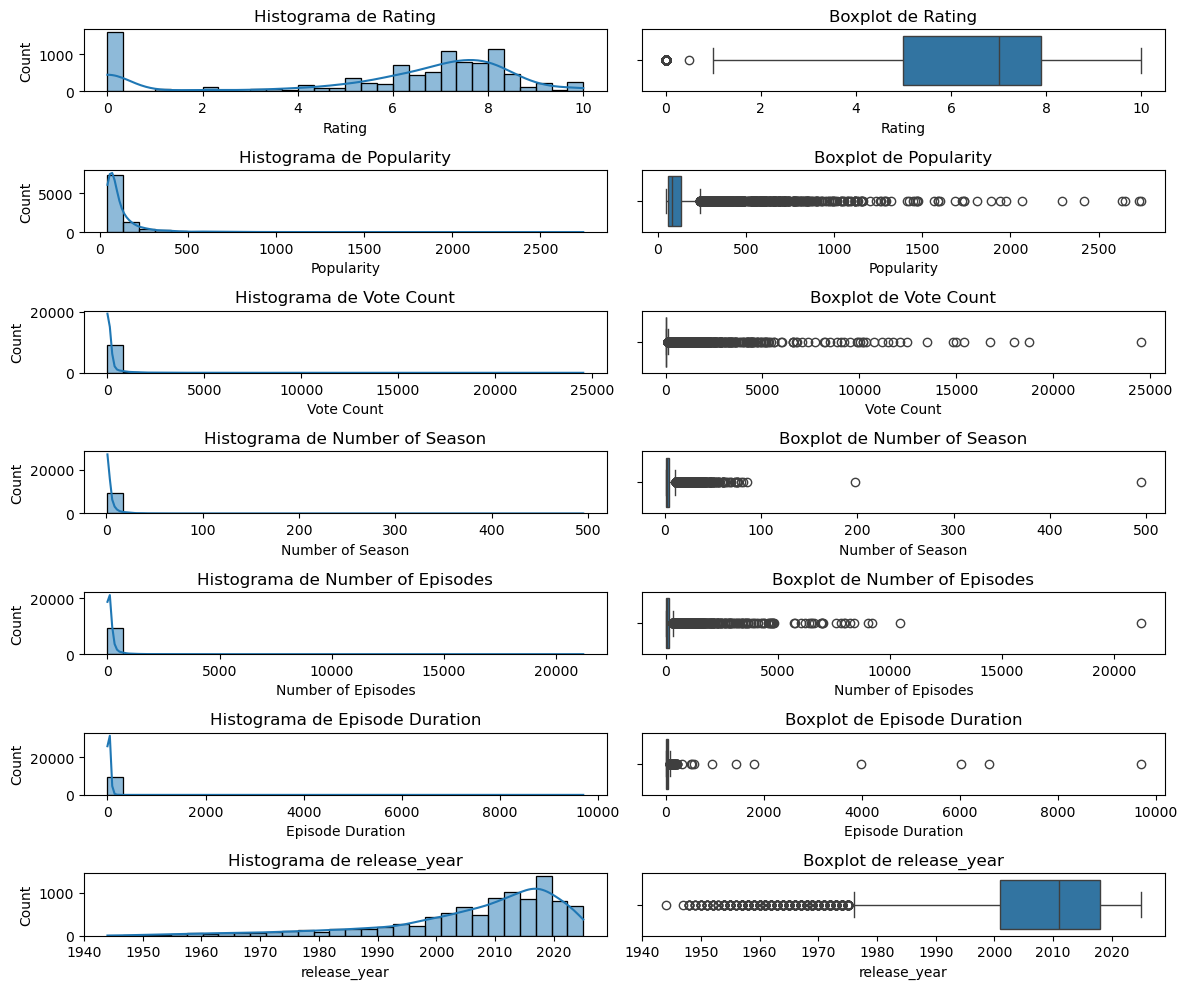

In [53]:
plt.figure(figsize=(12, 10))
for i, column in enumerate(num, 1):
    plt.subplot(len(num), 2, i*2-1)
    sns.histplot(df[column], bins = 30, kde = True)
    plt.title(f"Histograma de {column}")

    plt.subplot(len(num), 2, i*2)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

In [54]:
df.describe() # rating, vote count y episode duration tienen 0 

,Rating,Popularity,Vote Count,First Air Date,Number of Season,Number of Episodes,Episode Duration,release_year
count,9642.000000,9642.000000,9642.000000,9642,9642.000000,9642.000000,9642.000000,9642.000000
mean,5.822463,127.120060,187.122278,2007-05-26 23:58:48.313627904,4.449077,179.197262,35.010128,2006.926260
min,0.000000,44.858000,0.000000,1944-01-20 00:00:00,1.000000,1.000000,0.000000,1944.000000
25%,5.000000,57.617750,1.000000,2001-04-03 06:00:00,1.000000,36.000000,14.000000,2001.000000
50%,7.000000,79.518000,6.000000,2011-10-02 12:00:00,2.000000,68.000000,28.000000,2011.000000
75%,7.900000,131.006750,49.000000,2018-02-22 12:00:00,5.000000,153.000000,45.000000,2018.000000
max,10.000000,2742.445000,24560.000000,2025-02-08 00:00:00,495.000000,21205.000000,9700.000000,2025.000000
std,2.972342,159.052467,846.646974,NaN,8.809356,530.728116,144.535562,14.961024


In [55]:
pd.set_option("display.max_rows", 20)

### RATING

In [56]:
df[(df["Rating"] == 0) & (df["Vote Count"]== 0)] # hay 1587 valores de rating igual a 0 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
23,Secret Story - Desafio Final,"Spin-off show from the reality show ""Secret St...",Reality,0.0,1445.169,0,Portuguese,Portugal,2013-01-06,True,Returning Series,7,139,82.5,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/vLUonwbZ2im6ii...,No trailer available,2013
31,Choti Sarrdaarni,"Kulwant Kaur, a Punjab-based widow, goes again...",Drama,0.0,1260.839,0,Hindi,India,2019-07-01,False,Ended,1,810,24.0,No platforms available,No reviews,"Nimrit Ahluwalia, Avinesh Rekhi, Shivendraa Om...",https://image.tmdb.org/t/p/w500/uMuB9iMaAMOeqi...,No trailer available,2019
36,HK 80's,This sitcom series premiered in 1981 and chan...,"Comedy, Drama, Family",0.0,1159.635,0,Cantonese,Hong Kong,1981-06-08,False,Ended,6,1310,0.0,No platforms available,No reviews,"Wong San, Leung Bo-Ching, Leung Chung-Fun, Joh...",https://image.tmdb.org/t/p/w500/6IpuLrhh7XZfIv...,No trailer available,1981
44,Comedy Big League,NaN,Comedy,0.0,1118.085,0,Korean,"Korea, Republic of",2011-09-17,True,Returning Series,4,547,77.5,No platforms available,No reviews,"Lee Gook-ju, Hwang Je-sung, Lee Sang-jun, Shin...",https://image.tmdb.org/t/p/w500/cDVfraJA0rh7fH...,No trailer available,2011
56,A Kindred Spirit,A Kindred Spirit was a television drama series...,"Drama, Comedy",0.0,1015.575,0,Cantonese,Hong Kong,1995-05-15,False,Ended,1,1128,40.0,No platforms available,No reviews,"Louise Lee Si-Kei, Lau Dan, Ram Chiang Chi-Kwo...",https://image.tmdb.org/t/p/w500/fpOAhBePSowxPs...,No trailer available,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661,さくら心中,NaN,NaN,0.0,44.985,0,Japanese,Japan,2011-01-05,True,Returning Series,1,63,0.0,Hulu,No reviews,"Yûko Fueki, Hidenori Tokuyama, Kenji Matsuda, ...",https://image.tmdb.org/t/p/w500/sZhrITByVizZxg...,No trailer available,2011
9667,チロリン村物语,NaN,"Animation, Drama",0.0,44.939,0,Japanese,Japan,1992-04-06,False,Ended,1,57,25.0,No platforms available,No reviews,"Noriko Hidaka, Minami Takayama",https://image.tmdb.org/t/p/w500/vqLTjzysXGR0Y9...,No trailer available,1992
9672,Dear You,"Alma, a young Parisian, juggles between her pr...","Comedy, Soap",0.0,44.928,0,French,France,2025-02-07,True,Returning Series,1,15,26.0,Amazon Prime Video,No reviews,"Carla Poquin, Louka Meliava, Terence Telle",https://image.tmdb.org/t/p/w500/3jwsaJ3um9nNho...,No trailer available,2025
9673,Trouble Chocolate,Trouble Chocolate is a comedy anime produced b...,Animation,0.0,44.927,0,Japanese,Japan,1999-10-09,False,Ended,1,20,25.0,No platforms available,No reviews,"Naoki Yanagi, Sakura Tange, Tomohiro Tsuboi, Y...",https://image.tmdb.org/t/p/w500/1cuKj2GsMl33ot...,No trailer available,1999


La mayoría de series con rating 0 son de Japón, China, Korea, Philipinas y US, pero tiene que ser un error puesto que el VOTE COUNT también es 0

In [57]:
df[(df["Rating"] == 0) & (df["Vote Count"]== 0)].groupby("Origin Country").size().reset_index(name="Num Series").sort_values(by=["Num Series"], ascending=False)

,Origin Country,Num Series
28,Japan,248
9,China,219
31,"Korea, Republic of",134
42,Philippines,133
60,United States,95
...,...,...
30,"Korea, Democratic People's Republic of",1
47,Serbia,1
32,Latvia,1
24,"Iran, Islamic Republic of",1


In [58]:
df[(df["Rating"] == 0)].groupby("Origin Country").size().reset_index(name="Num Series").sort_values(by=["Num Series"], ascending=False)

,Origin Country,Num Series
28,Japan,250
9,China,220
31,"Korea, Republic of",135
42,Philippines,133
60,United States,95
...,...,...
30,"Korea, Democratic People's Republic of",1
47,Serbia,1
32,Latvia,1
24,"Iran, Islamic Republic of",1


Decido convertir los 0 de ratings en nulos para quedarme con los valores más reales

In [59]:
df["Rating"] = df["Rating"].replace(0, np.nan)

In [60]:
df[df["Rating"]== 0.5]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
761,A Sudden Text,"Maude, Jennifer, Melanie, Vincent, and Sami n...","Family, Comedy",0.5,268.288,2,French,Canada,2014-01-06,False,Ended,5,309,25.0,No platforms available,No reviews,"Alice Morel-Michaud, Louka Grenon, Camille Fel...",https://image.tmdb.org/t/p/w500/tqvIurinijhVOc...,No trailer available,2014


Text(0.5, 1.0, 'Histograma de Rating')

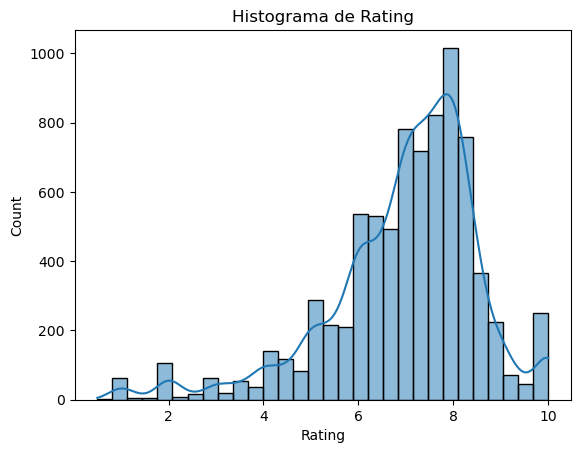

In [61]:
sns.histplot(df["Rating"], bins = 30, kde = True)
plt.title(f"Histograma de Rating")

<Axes: xlabel='Rating'>

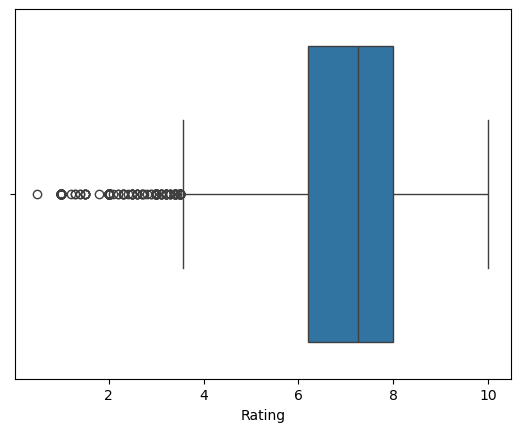

In [62]:
sns.boxplot(data = df, x = "Rating")

In [63]:
len(df[df["Rating"]<4])

379

Las series con más de 8 de rating suelen ser japonesas, de US, China, Korea y Russia

In [64]:
df[df["Rating"]>8].groupby("Origin Country").size().reset_index(name="Num Series").sort_values(by=["Num Series"], ascending=False)

,Origin Country,Num Series
30,Japan,513
59,United States,328
9,China,247
32,"Korea, Republic of",193
44,Russian Federation,49
...,...,...
38,North Macedonia,1
47,Singapore,1
14,Dominican Republic,1
41,Portugal,1


Las series peor valoradas son de Korea, Us, Chile, Germany y Japan

In [65]:
df[df["Rating"]<4].groupby("Origin Country").size().reset_index(name="Num Series").sort_values(by=["Num Series"], ascending=False)

,Origin Country,Num Series
22,"Korea, Republic of",55
40,United States,42
7,Chile,38
14,Germany,33
21,Japan,22
...,...,...
12,Finland,1
20,Italy,1
31,Singapore,1
5,Bulgaria,1


In [66]:
df[df["Rating"]==10] # hay 232 series con un rating de 10, pero solo cuentan con 1 voto o 2 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
250,Pyaar Kii Ye Ek Kahaani,This supernatural series narrates the story of...,"Mystery, Drama, Soap",10.0,535.372,1,Hindi,India,2010-10-18,False,Ended,10,331,23.5,No platforms available,No reviews,"Vivian Dsena, Sukirti Kandpal, Priya Wal, Kish...",https://image.tmdb.org/t/p/w500/97AsoipHKoy1dh...,https://www.youtube.com/watch?v=XtCNF9qIyRE,2010
261,Incognito,"In search of redemption, a crew of misfits joi...","Action & Adventure, Drama",10.0,317.995,1,Tagalog,Philippines,2025-01-20,True,Returning Series,1,50,0.0,Netflix,No reviews,"Daniel Padilla, Richard Gutierrez, Ian Venerac...",https://image.tmdb.org/t/p/w500/8jdXvKWFllqPCD...,https://www.youtube.com/watch?v=V2RUkzEnXFA,2025
264,Chinna Thambi,"Two people, who are poles apart, find love in ...","Drama, Comedy",10.0,466.033,1,Other,India,2017-10-02,True,Returning Series,1,320,30.0,No platforms available,No reviews,"Prajin Padmanabhan, Pavani Reddy, Hema Rajkuma...",https://image.tmdb.org/t/p/w500/jG0NkAFEJNuREd...,No trailer available,2017
330,3000 Whys of Blue Cat,3000 Whys of Blue Cat is the first large-scale...,"Kids, Animation",10.0,307.868,1,Chinese,China,1999-10-09,False,Ended,7,2161,10.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/vCRRb67Dv1G5sY...,No trailer available,1999
520,No Way I'm an Adult,NaN,Documentary,10.0,340.914,1,Korean,"Korea, Republic of",2015-09-10,True,Returning Series,3,209,60.0,No platforms available,No reviews,"Kim Sang-joong, Ha Seok-jin",https://image.tmdb.org/t/p/w500/qi56MjNnvYKr46...,No trailer available,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9560,我们都爱笑,NaN,Reality,10.0,45.366,1,Chinese,China,2014-02-15,False,Ended,2,91,0.0,No platforms available,No reviews,"Helong Wang, Xu Xiao, Zheng Gu, Lin Siyi, Xixi...",https://image.tmdb.org/t/p/w500/ezbbxp57CGyMIK...,No trailer available,2014
9578,Hi-Jinks,Hi-Jinks is a hidden camera show that premiere...,Comedy,10.0,45.279,1,English,United States,2005-08-02,False,Ended,3,18,30.0,No platforms available,No reviews,Leila Sbitani,https://image.tmdb.org/t/p/w500/fJN0caCYSPGz7S...,No trailer available,2005
9598,Charging Topspinner,In a modern society where top spinners are pop...,"Animation, Kids, Action & Adventure, Comedy, S...",10.0,45.212,1,Korean,"Korea, Republic of",2023-06-05,True,Returning Series,3,52,20.0,Watcha,No reviews,"Park Shi-yoon, Kim Myung-jun",https://image.tmdb.org/t/p/w500/qCn3gAAxfqoMIK...,https://www.youtube.com/watch?v=3vk39Hf_dDg,2023
9629,Kuch Rang Pyar Ke Aise Bhi,Kuch Rang Pyar Ke Aise Bhi (Some Colors Of Lov...,"Drama, Soap, Family",10.0,45.118,2,Hindi,India,2016-02-29,False,Ended,3,67,0.0,Sony Liv,No reviews,"Erica Fernandes, Shaheer Sheikh, Supriya Pilga...",https://image.tmdb.org/t/p/w500/38iQPks9U1rY0o...,No trailer available,2016


In [67]:
df[df["Rating"]==10].groupby("Origin Country").size().reset_index(name="Num Series").sort_values(by=["Num Series"], ascending=False)

,Origin Country,Num Series
19,Japan,43
7,China,41
20,"Korea, Republic of",21
35,United States,17
15,Hong Kong,15
...,...,...
10,Dominican Republic,1
1,Austria,1
17,Indonesia,1
11,Egypt,1


In [68]:
df.groupby("Origin Country")["Rating"].mean()

Origin Country
Argentina                             6.044814
Australia                             6.368775
Austria                               6.343687
Bangladesh                           10.000000
Belgium                               6.273026
                                       ...    
Ukraine                               7.175091
United Arab Emirates                  6.050000
United Kingdom                        6.558021
United States                         7.090616
Venezuela, Bolivarian Republic of     5.188889
Name: Rating, Length: 80, dtype: float64

In [69]:
df.groupby("Origin Country").agg(num_series = ("Rating", "size"), avg_rating = ("Rating", "mean")).sort_values(by="num_series", ascending=False)

,num_series,avg_rating
Origin Country,,
United States,2038,7.090616
Japan,1935,7.396561
China,966,7.432965
"Korea, Republic of",848,6.685112
United Kingdom,484,6.558021
...,...,...
Bosnia and Herzegovina,1,7.200000
Latvia,1,NaN
"Korea, Democratic People's Republic of",1,NaN


### POPULARITY

In [70]:
# convierto popularity de float a int
df["Popularity"] = df["Popularity"].astype(int)

Text(0.5, 1.0, 'Boxplot')

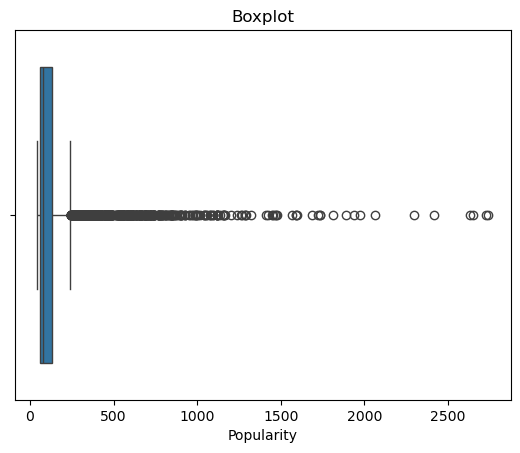

In [71]:
sns.boxplot(data = df, x="Popularity")
plt.title(f"Boxplot")

Text(0.5, 1.0, 'Histograma')

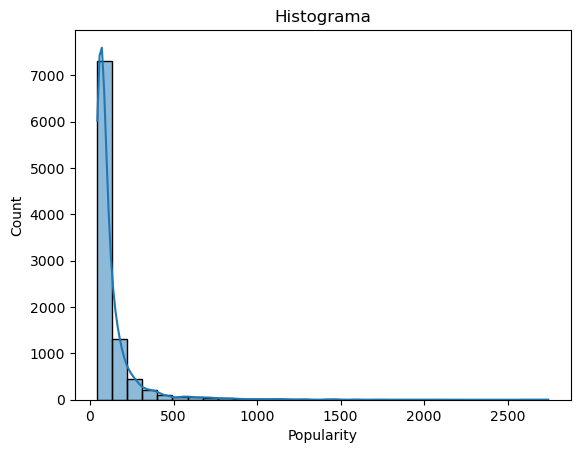

In [72]:
sns.histplot(data = df, x= "Popularity", bins = 30, kde = True)
plt.title(f"Histograma")

In [73]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(df["Popularity"],75) - np.percentile(df["Popularity"],25)
upper_limit = np.percentile(df["Popularity"],75) + 1.5*iqr
print(upper_limit)

242.0


In [74]:
removed = df[df["Popularity"] > upper_limit]
len(removed)  # This checks the number of outliers that will be removed, too many

902

In [75]:
df.describe()

,Rating,Popularity,Vote Count,First Air Date,Number of Season,Number of Episodes,Episode Duration,release_year
count,8047.000000,9642.000000,9642.000000,9642,9642.000000,9642.000000,9642.000000,9642.000000
mean,6.976536,126.617196,187.122278,2007-05-26 23:58:48.313627904,4.449077,179.197262,35.010128,2006.926260
min,0.500000,44.000000,0.000000,1944-01-20 00:00:00,1.000000,1.000000,0.000000,1944.000000
25%,6.200000,57.000000,1.000000,2001-04-03 06:00:00,1.000000,36.000000,14.000000,2001.000000
50%,7.264000,79.000000,6.000000,2011-10-02 12:00:00,2.000000,68.000000,28.000000,2011.000000
75%,8.000000,131.000000,49.000000,2018-02-22 12:00:00,5.000000,153.000000,45.000000,2018.000000
max,10.000000,2742.000000,24560.000000,2025-02-08 00:00:00,495.000000,21205.000000,9700.000000,2025.000000
std,1.591777,159.053956,846.646974,NaN,8.809356,530.728116,144.535562,14.961024


In [76]:
df.loc[[df["Popularity"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
0,GH Dúo,NaN,Reality,7.3,2742,3,Spanish,Spain,2019-01-08,True,Returning Series,3,146,105.0,Tivify,No reviews,NaN,https://image.tmdb.org/t/p/w500/sgPv3qMYHKwxz9...,No trailer available,2019


In [77]:
df.loc[[df["Popularity"].idxmin()]] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
9653,Puppy Dog Pals,"Fun-loving pug puppies, brothers Bingo and Rol...","Animation, Kids, Family, Comedy, Drama",6.1,44,16,English,United States,2017-04-14,True,Returning Series,5,232,12.0,"Hotstar, Amazon Prime Video, fuboTV, DisneyNOW...",Puppy Pal Fan here since the premiere of seaso...,"Harland Williams, Jessica DiCicco, Elisha Will...",https://image.tmdb.org/t/p/w500/Aa6Bo1lcuFxT3D...,No trailer available,2017


In [78]:
df[df["Popularity"]>1000].groupby("Popularity")["Rating"].mean()

Popularity
1007    7.5
1015    NaN
1041    6.1
1044    4.6
1051    5.8
       ... 
2416    8.4
2634    5.5
2650    6.5
2731    8.9
2742    7.3
Name: Rating, Length: 55, dtype: float64

In [79]:
# los valores de Popularity van del 44 hasta el 2742
# que sean más populares sin embargo no significa que tenga un rating más alto

In [80]:
pd.set_option("display.max_rows", None)

In [81]:
df.groupby("Origin Country").agg(num_series = ("Popularity", "size"), avg_popularity = ("Popularity", "mean")).sort_values(by="num_series", ascending=False)

,num_series,avg_popularity
Origin Country,,
United States,2038,129.301276
Japan,1935,117.742636
China,966,91.226708
"Korea, Republic of",848,132.476415
United Kingdom,484,141.716942
Germany,307,170.084691
Canada,262,112.473282
Philippines,195,109.733333
India,195,171.410256


### VOTE COUNT

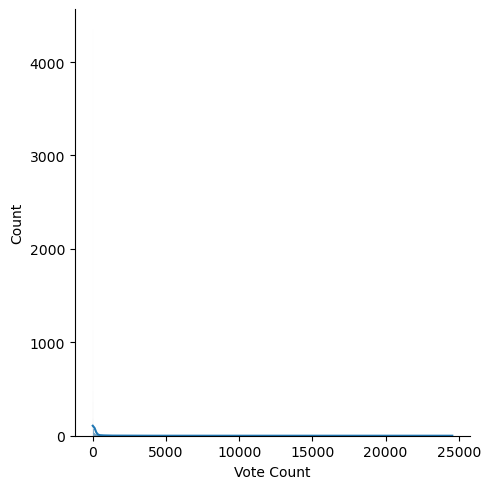

In [82]:
sns.displot(df["Vote Count"], kde = True)
plt.show()

Text(0.5, 1.0, 'Boxplot')

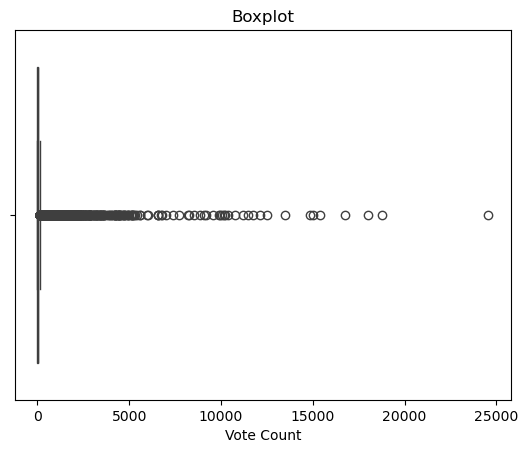

In [83]:
sns.boxplot(data = df, x="Vote Count")
plt.title(f"Boxplot")

In [84]:
df.loc[[df["Vote Count"].idxmax()]] # tiene sentido que el vote count para esta serie sea muy alto

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
108,Game of Thrones,Seven noble families fight for control of the ...,"Sci-Fi & Fantasy, Drama, Action & Adventure",8.5,774,24560,English,United States,2011-04-17,False,Ended,8,73,0.0,"Sky X, Spectrum On Demand, Strim, Neon TV, Mov...",I started watching when it came out as I heard...,"Peter Dinklage, Kit Harington, Nikolaj Coster-...",https://image.tmdb.org/t/p/w500/1XS1oqL89opfnb...,https://www.youtube.com/watch?v=KPLWWIOCOOQ,2011


In [85]:
pd.set_option("display.max_rows", 20)

In [86]:
df[df["Vote Count"]== 0] # el vote count =0 coincide con el rating null, hay 1595

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
23,Secret Story - Desafio Final,"Spin-off show from the reality show ""Secret St...",Reality,NaN,1445,0,Portuguese,Portugal,2013-01-06,True,Returning Series,7,139,82.5,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/vLUonwbZ2im6ii...,No trailer available,2013
31,Choti Sarrdaarni,"Kulwant Kaur, a Punjab-based widow, goes again...",Drama,NaN,1260,0,Hindi,India,2019-07-01,False,Ended,1,810,24.0,No platforms available,No reviews,"Nimrit Ahluwalia, Avinesh Rekhi, Shivendraa Om...",https://image.tmdb.org/t/p/w500/uMuB9iMaAMOeqi...,No trailer available,2019
36,HK 80's,This sitcom series premiered in 1981 and chan...,"Comedy, Drama, Family",NaN,1159,0,Cantonese,Hong Kong,1981-06-08,False,Ended,6,1310,0.0,No platforms available,No reviews,"Wong San, Leung Bo-Ching, Leung Chung-Fun, Joh...",https://image.tmdb.org/t/p/w500/6IpuLrhh7XZfIv...,No trailer available,1981
44,Comedy Big League,NaN,Comedy,NaN,1118,0,Korean,"Korea, Republic of",2011-09-17,True,Returning Series,4,547,77.5,No platforms available,No reviews,"Lee Gook-ju, Hwang Je-sung, Lee Sang-jun, Shin...",https://image.tmdb.org/t/p/w500/cDVfraJA0rh7fH...,No trailer available,2011
56,A Kindred Spirit,A Kindred Spirit was a television drama series...,"Drama, Comedy",NaN,1015,0,Cantonese,Hong Kong,1995-05-15,False,Ended,1,1128,40.0,No platforms available,No reviews,"Louise Lee Si-Kei, Lau Dan, Ram Chiang Chi-Kwo...",https://image.tmdb.org/t/p/w500/fpOAhBePSowxPs...,No trailer available,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661,さくら心中,NaN,NaN,NaN,44,0,Japanese,Japan,2011-01-05,True,Returning Series,1,63,0.0,Hulu,No reviews,"Yûko Fueki, Hidenori Tokuyama, Kenji Matsuda, ...",https://image.tmdb.org/t/p/w500/sZhrITByVizZxg...,No trailer available,2011
9667,チロリン村物语,NaN,"Animation, Drama",NaN,44,0,Japanese,Japan,1992-04-06,False,Ended,1,57,25.0,No platforms available,No reviews,"Noriko Hidaka, Minami Takayama",https://image.tmdb.org/t/p/w500/vqLTjzysXGR0Y9...,No trailer available,1992
9672,Dear You,"Alma, a young Parisian, juggles between her pr...","Comedy, Soap",NaN,44,0,French,France,2025-02-07,True,Returning Series,1,15,26.0,Amazon Prime Video,No reviews,"Carla Poquin, Louka Meliava, Terence Telle",https://image.tmdb.org/t/p/w500/3jwsaJ3um9nNho...,No trailer available,2025
9673,Trouble Chocolate,Trouble Chocolate is a comedy anime produced b...,Animation,NaN,44,0,Japanese,Japan,1999-10-09,False,Ended,1,20,25.0,No platforms available,No reviews,"Naoki Yanagi, Sakura Tange, Tomohiro Tsuboi, Y...",https://image.tmdb.org/t/p/w500/1cuKj2GsMl33ot...,No trailer available,1999


In [87]:
# convierto los 0 de Vote Count a nulos 
df["Vote Count"] = df["Vote Count"].replace(0, np.nan)

### NUMBER OF SEASONS

Text(0.5, 1.0, 'Boxplot')

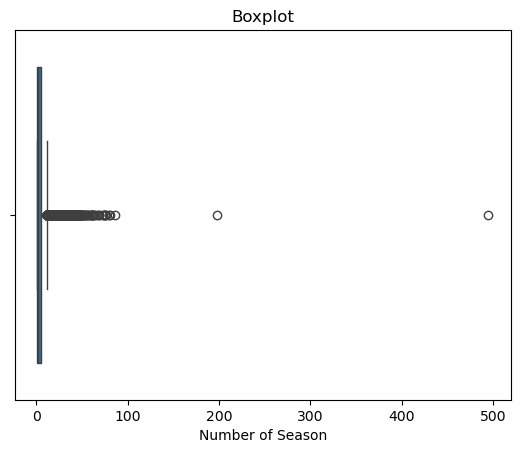

In [88]:
sns.boxplot(data = df, x="Number of Season")
plt.title(f"Boxplot")

In [89]:
df["Number of Season"].value_counts()

Number of Season
1     4456
2     1221
3      859
4      629
5      480
      ... 
60       1
66       1
53       1
55       1
63       1
Name: count, Length: 73, dtype: int64

In [90]:
df[df["Number of Season"]>20] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
3,World News Tonight with David Muir,ABC World News is the flagship daily evening t...,News,5.5,2634,8.0,English,United States,1948-08-11,True,Returning Series,32,108,30.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/e5bUkDlEOqPR7M...,No trailer available,1948
6,Ninja Boy Rantaro,"Rantarō, Shinbei and Kirimaru are ninja appre...","Comedy, Action & Adventure, Kids, Animation, F...",6.3,2065,15.0,Japanese,Japan,1993-04-10,True,Returning Series,26,1753,30.0,U-NEXT,No reviews,NaN,https://image.tmdb.org/t/p/w500/raKlXyICQBeTxY...,No trailer available,1993
11,Klan,"Family is the most important thing, and the ch...",Soap,4.7,1734,7.0,Polish,Poland,1997-09-22,True,Returning Series,27,3564,25.0,No platforms available,No reviews,"Kaja Paschalska, Tomasz Bednarek, Barbara Burs...",https://image.tmdb.org/t/p/w500/vuSKqHmKLrKG2A...,No trailer available,1997
18,Coronation Street,The residents of Coronation Street are ordinar...,Soap,5.3,1567,110.0,English,Malaysia,1960-12-09,True,Returning Series,66,3936,24.0,No platforms available,If I were rating the Coronation Street classic...,William Roache,https://image.tmdb.org/t/p/w500/5x1HXqYqPyYw7o...,No trailer available,1960
29,Law of the Jungle,Law of the Jungle is a hybrid reality show com...,Reality,4.7,1285,7.0,Korean,"Korea, Republic of",2011-10-21,False,Ended,57,870,0.0,"Rakuten Viki, wavve, Claro tv+, Kocowa",No reviews,Kim Byung-man,https://image.tmdb.org/t/p/w500/zgMOq3H27nYikq...,No trailer available,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,KBS Drama Awards,The KBS Drama Awards is an awards ceremony pre...,Reality,8.0,45,1.0,Korean,"Korea, Republic of",1987-12-31,True,Returning Series,36,28,0.0,Viu,No reviews,NaN,https://image.tmdb.org/t/p/w500/zgtYqwcyA4XW5v...,No trailer available,1987
9596,On the Case with Paula Zahn,Award winning journalist Paula Zahn unravels s...,"Crime, Documentary",8.3,45,17.0,English,United States,2009-10-18,True,Returning Series,27,383,43.0,"Discovery+, Discovery +, Sky Go, Crime+ Invest...",No reviews,Paula Zahn,https://image.tmdb.org/t/p/w500/5Hbir2fSCFr52t...,No trailer available,2009
9609,The Generation Game,The Generation Game was a British game show pr...,"Reality, Comedy",9.0,45,1.0,English,United Kingdom,1971-10-02,False,Ended,23,414,60.0,No platforms available,No reviews,"Jim Davidson, Bruce Forsyth, Larry Grayson",https://image.tmdb.org/t/p/w500/fcuWlUsR6kXWHE...,No trailer available,1971
9617,Eurovision Song Contest,The Eurovision Song Contest is an internationa...,Reality,7.1,45,28.0,English,Switzerland,1956-05-24,True,Returning Series,69,107,0.0,No platforms available,No reviews,"Petra Mede, Malin Åkerman",https://image.tmdb.org/t/p/w500/kG2UO5pT91NckA...,https://www.youtube.com/watch?v=luUb_nVyPHE,1956


In [91]:
df.loc[[df["Number of Season"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
5170,Lecture Room,NaN,"Talk, Documentary",10.0,75,1.0,Chinese,China,2001-07-09,True,Returning Series,495,6947,0.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/7bS6LJn4EpopXS...,No trailer available,2001


In [92]:
# eliminamos este outlier
df.drop(df[df["Number of Season"] == 495].index, inplace=True)

In [93]:
df.loc[df["Number of Season"]> 60].sort_values(by="Number of Season", ascending=False)
# es cierto que Pili tiene 86 temporadas 
# house hunters international tiene 198 temporadas 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
7620,House Hunters International,This spin-off of the wildly popular House Hunt...,Reality,6.400,55,25.0,English,United States,2006-03-06,True,Returning Series,198,1579,23.0,"Discovery+, Discovery +, Hulu, Max, Discovery+...",No reviews,NaN,https://image.tmdb.org/t/p/w500/uzPQ3FvOtmMrvG...,No trailer available,2006
4158,Pili,Pili is a puppet show from Taiwan. It is made ...,"Action & Adventure, Drama",7.400,88,6.0,Chinese,"Taiwan, Province of China",1988-06-01,True,Returning Series,86,2914,60.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/c6CKmPSXO8omy0...,No trailer available,1988
3881,Golden Globe Awards,An annual awards ceremony recognizing excellen...,Talk,6.800,93,14.0,English,United States,1944-01-20,True,Returning Series,81,81,130.0,Max,No reviews,NaN,https://image.tmdb.org/t/p/w500/gYG3SHNKui9ps9...,No trailer available,1944
1319,Meet the Press,Meet the Press is a weekly American television...,"News, Talk",3.800,192,11.0,English,United States,1947-11-06,True,Returning Series,79,3241,56.5,No platforms available,No reviews,"Kristen Welker, Chuck Todd",https://image.tmdb.org/t/p/w500/lisjDmT2xTykSZ...,No trailer available,1947
3484,Countdown,The clock is ticking as contestants compete in...,Reality,5.778,100,18.0,English,United Kingdom,1982-11-02,True,Returning Series,76,5756,40.5,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/dMQxcOLpq0D6TE...,No trailer available,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5377,Chopped,"A high energy, fast paced cooking competition ...",Reality,6.200,73,56.0,English,United States,2009-01-13,True,Returning Series,61,769,52.0,"Discovery+, Discovery +, Hulu, Food Network, M...",No reviews,Ted Allen,https://image.tmdb.org/t/p/w500/x7g390tj73dtlG...,https://www.youtube.com/watch?v=_zAJxNldNw8,2009
1361,Match of the Day,"BBC's football highlights and analysis.\n\n""Th...","Talk, News",7.419,188,43.0,English,United Kingdom,1964-08-22,True,Returning Series,61,3187,80.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/paRFRd11WlFOxV...,No trailer available,1964
6833,Golden Horse Awards,The Taipei Golden Horse Film Festival and Awar...,Documentary,NaN,60,NaN,Chinese,"Taiwan, Province of China",1962-10-31,True,Returning Series,61,61,0.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/q9H3q7q99hIwMF...,No trailer available,1962
7033,Das aktuelle Sportstudio,Das aktuelle sportstudio is a German sport mag...,News,NaN,59,NaN,German,Germany,1963-08-24,True,Returning Series,61,563,0.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500None,No trailer available,1963


In [94]:
df.loc[df["Title"] == "Ek Rishta Saajhedari Ka", "Number of Season"]= 1

In [95]:
df.drop(df[df["Title"] == "今日、好きになりました。"].index, inplace=True)

In [96]:
df[df["Number of Season"]>40].groupby("release_year")["Number of Season"].size()

release_year
1944    1
1947    1
1951    1
1952    1
1953    1
       ..
2006    1
2007    1
2009    1
2011    2
2016    1
Name: Number of Season, Length: 40, dtype: int64

In [97]:
df[df["Number of Season"]>40].groupby("Origin Country")["Number of Season"].size()

Origin Country
Australia                     2
Austria                       1
Canada                        1
Chile                         1
China                         1
Germany                       9
Italy                         2
Japan                         1
Korea, Republic of            2
Malaysia                      1
Sweden                        1
Switzerland                   1
Taiwan, Province of China     2
United Kingdom               16
United States                24
Name: Number of Season, dtype: int64

In [98]:
# US, UK y Germany son los Países con más series que tienen más de 40 temporadas

In [99]:
pd.set_option("display.max_rows", None)

In [100]:
df.groupby("Origin Country").agg(num_series = ("Number of Season", "size"), avg_seasons = ("Number of Season", "mean")).sort_values(by="num_series", ascending=False)

,num_series,avg_seasons
Origin Country,,
United States,2038,6.280177
Japan,1934,1.960186
China,965,1.806218
"Korea, Republic of",848,1.788915
United Kingdom,484,10.737603
Germany,307,12.166124
Canada,262,6.011450
Philippines,195,1.143590
India,195,2.312821


In [101]:
pd.set_option("display.max_rows", 20)

In [102]:
df[(df["Number of Season"]> 40) &(df["release_year"]> 1990)]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
29,Law of the Jungle,Law of the Jungle is a hybrid reality show com...,Reality,4.7,1285,7.0,Korean,"Korea, Republic of",2011-10-21,False,Ended,57,870,0.0,"Rakuten Viki, wavve, Claro tv+, Kocowa",No reviews,Kim Byung-man,https://image.tmdb.org/t/p/w500/zgMOq3H27nYikq...,No trailer available,2011
159,Survivor,A reality show contest where sixteen or more c...,Reality,7.4,665,386.0,English,United States,2000-05-31,True,Returning Series,48,694,0.0,"Paramount+ Roku Premium Channel, Hulu, Paramou...",No reviews,Jeff Probst,https://image.tmdb.org/t/p/w500/1usR1nanbDvnc0...,https://www.youtube.com/watch?v=498116666,2000
163,LOONA TV,"LOONA TV (이달의 소녀 탐구, Girl of the Month Inquiry...","Reality, Comedy",7.0,660,3.0,Korean,"Korea, Republic of",2016-10-12,False,Canceled,48,775,1.0,No platforms available,No reviews,"HeeJin, HyunJin, HaSeul, YeoJin, ViVi",https://image.tmdb.org/t/p/w500/i4afg3YM6wfdDs...,No trailer available,2016
178,Ridiculousness,Rob Dyrdek takes the funniest amateur internet...,"Comedy, Talk, Reality",6.9,634,108.0,English,United States,2011-08-29,True,Returning Series,42,1560,26.0,"Paramount+ Roku Premium Channel, Sky Go, Tele2...",No reviews,"Rob Dyrdek, Chanel West Coast, Sterling 'Steel...",https://image.tmdb.org/t/p/w500/4rJdcHQrE4stnZ...,https://www.youtube.com/watch?v=vJd0drakfeY,2011
1587,Alarm for Cobra 11: The Motorway Police,A long-running German television series about ...,"Drama, Comedy, Action & Adventure",6.5,172,117.0,German,Germany,1996-03-12,True,Returning Series,50,383,45.0,"Telia Play, Tivify, blutv, Go3, O2 TV, Molotov...",No reviews,NaN,https://image.tmdb.org/t/p/w500/mPhVxedeais0wt...,No trailer available,1996
3097,"Diners, Drive-Ins and Dives",Host Guy Fieri takes a cross-country road trip...,"Documentary, Reality",6.6,110,60.0,English,United States,2007-04-23,True,Returning Series,51,666,22.0,"Discovery+, Discovery +, Hulu, Sky Go, Food Ne...",No reviews,Guy Fieri,https://image.tmdb.org/t/p/w500/1ulyar2gfSnPaE...,https://www.youtube.com/watch?v=Hc6pD8Ps_hk,2007
3147,Le Iene,"Comedy/satirical show, with sketches and repor...","News, Comedy",6.8,108,5.0,Italian,Italy,1997-09-22,True,Returning Series,48,291,160.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/4PMQejuRcxYyi5...,No trailer available,1997
5377,Chopped,"A high energy, fast paced cooking competition ...",Reality,6.2,73,56.0,English,United States,2009-01-13,True,Returning Series,61,769,52.0,"Discovery+, Discovery +, Hulu, Food Network, M...",No reviews,Ted Allen,https://image.tmdb.org/t/p/w500/x7g390tj73dtlG...,https://www.youtube.com/watch?v=_zAJxNldNw8,2009
7620,House Hunters International,This spin-off of the wildly popular House Hunt...,Reality,6.4,55,25.0,English,United States,2006-03-06,True,Returning Series,198,1579,23.0,"Discovery+, Discovery +, Hulu, Max, Discovery+...",No reviews,NaN,https://image.tmdb.org/t/p/w500/uzPQ3FvOtmMrvG...,No trailer available,2006


In [103]:
# puede parecer raro pero sí, la serie diners, drive-ins and dives tiene 51 temporadas a pesar de haberse estrenado en 2007
# he revisado en internet y el número de temporadas de estas series es correcto
# menos Le Iene y Alerta Cobra, vamos a cambiar los valores


In [104]:
df.loc[df["Title"] == "Le Iene", "Number of Season"]= 28

In [105]:
df.loc[df["Title"] == "Le Iene", "Number of Episodes"]= 938

In [106]:
df.loc[df["Title"] == "Alarm for Cobra 11: The Motorway Police", "Number of Season"]= 25

Todas las series que tienen más de 40 temporadas son reality TV

In [107]:
df[(df["Number of Season"]> 40) &(df["release_year"]> 1990)]


,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
29,Law of the Jungle,Law of the Jungle is a hybrid reality show com...,Reality,4.7,1285,7.0,Korean,"Korea, Republic of",2011-10-21,False,Ended,57,870,0.0,"Rakuten Viki, wavve, Claro tv+, Kocowa",No reviews,Kim Byung-man,https://image.tmdb.org/t/p/w500/zgMOq3H27nYikq...,No trailer available,2011
159,Survivor,A reality show contest where sixteen or more c...,Reality,7.4,665,386.0,English,United States,2000-05-31,True,Returning Series,48,694,0.0,"Paramount+ Roku Premium Channel, Hulu, Paramou...",No reviews,Jeff Probst,https://image.tmdb.org/t/p/w500/1usR1nanbDvnc0...,https://www.youtube.com/watch?v=498116666,2000
163,LOONA TV,"LOONA TV (이달의 소녀 탐구, Girl of the Month Inquiry...","Reality, Comedy",7.0,660,3.0,Korean,"Korea, Republic of",2016-10-12,False,Canceled,48,775,1.0,No platforms available,No reviews,"HeeJin, HyunJin, HaSeul, YeoJin, ViVi",https://image.tmdb.org/t/p/w500/i4afg3YM6wfdDs...,No trailer available,2016
178,Ridiculousness,Rob Dyrdek takes the funniest amateur internet...,"Comedy, Talk, Reality",6.9,634,108.0,English,United States,2011-08-29,True,Returning Series,42,1560,26.0,"Paramount+ Roku Premium Channel, Sky Go, Tele2...",No reviews,"Rob Dyrdek, Chanel West Coast, Sterling 'Steel...",https://image.tmdb.org/t/p/w500/4rJdcHQrE4stnZ...,https://www.youtube.com/watch?v=vJd0drakfeY,2011
3097,"Diners, Drive-Ins and Dives",Host Guy Fieri takes a cross-country road trip...,"Documentary, Reality",6.6,110,60.0,English,United States,2007-04-23,True,Returning Series,51,666,22.0,"Discovery+, Discovery +, Hulu, Sky Go, Food Ne...",No reviews,Guy Fieri,https://image.tmdb.org/t/p/w500/1ulyar2gfSnPaE...,https://www.youtube.com/watch?v=Hc6pD8Ps_hk,2007
5377,Chopped,"A high energy, fast paced cooking competition ...",Reality,6.2,73,56.0,English,United States,2009-01-13,True,Returning Series,61,769,52.0,"Discovery+, Discovery +, Hulu, Food Network, M...",No reviews,Ted Allen,https://image.tmdb.org/t/p/w500/x7g390tj73dtlG...,https://www.youtube.com/watch?v=_zAJxNldNw8,2009
7620,House Hunters International,This spin-off of the wildly popular House Hunt...,Reality,6.4,55,25.0,English,United States,2006-03-06,True,Returning Series,198,1579,23.0,"Discovery+, Discovery +, Hulu, Max, Discovery+...",No reviews,NaN,https://image.tmdb.org/t/p/w500/uzPQ3FvOtmMrvG...,No trailer available,2006


In [108]:
df.loc[[df["Number of Season"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
7620,House Hunters International,This spin-off of the wildly popular House Hunt...,Reality,6.4,55,25.0,English,United States,2006-03-06,True,Returning Series,198,1579,23.0,"Discovery+, Discovery +, Hulu, Max, Discovery+...",No reviews,NaN,https://image.tmdb.org/t/p/w500/uzPQ3FvOtmMrvG...,No trailer available,2006


In [109]:
df.loc[[df["Number of Season"].idxmin()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
4,Running Man,A reality and competition show where members a...,"Comedy, Reality",8.4,2416,180.0,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,1,739,85.0,"wavve, Rakuten Viki, Viu, OnDemandKorea, Watch...",No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",https://image.tmdb.org/t/p/w500/2Wmmu1MkqxJ48J...,No trailer available,2010


In [110]:
df.loc[df["Title"] == "Running Man", "Number of Season"]= 15

In [111]:
df.loc[[df["Number of Season"].idxmin()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
14,Autumn of the Heart,A devastating car accident unearths a long-bur...,"Drama, Family",4.2,1686,18.0,Arabic,Saudi Arabia,2024-10-27,True,Returning Series,1,87,45.0,No platforms available,No reviews,"Abdul Mohsen Al-Nimr, Elham Ali, مروه محمد, Lu...",https://image.tmdb.org/t/p/w500/8uDmIxjBx90y5O...,No trailer available,2024


### NUMBER OF EPISODES

Text(0.5, 1.0, 'Histograma')

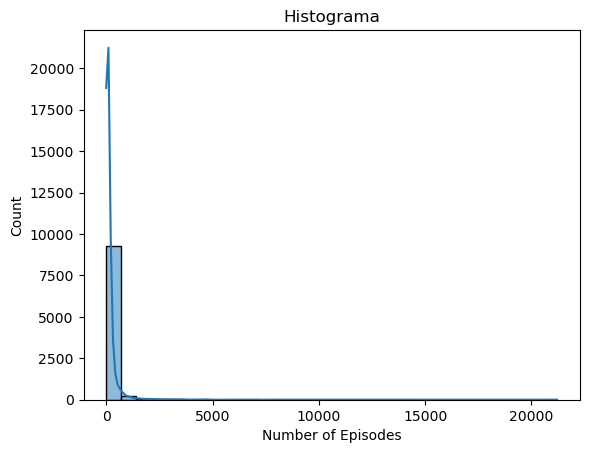

In [112]:
sns.histplot(data = df, x= "Number of Episodes", bins = 30, kde = True)
plt.title(f"Histograma")

In [113]:
df.loc[[df["Number of Episodes"].idxmin()]] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
3351,桂ちづる診察日録,NaN,NaN,NaN,103,NaN,Japanese,Japan,2010-09-04,True,Returning Series,1,1,0.0,No platforms available,No reviews,"Yui Ichikawa, Masanobu Takashima, Yuji Miyake,...",https://image.tmdb.org/t/p/w500/lNA6Kkr7FCDiJl...,No trailer available,2010


In [114]:
# la elimino 
df.drop(df[df["Title"] == "桂ちづる診察日録"].index, inplace=True)

In [115]:
df.loc[[df["Number of Episodes"].idxmin()]] # claramente está mal, puesto que tiene 11 temporadas

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
4568,Berggespräche,NaN,Talk,NaN,82,NaN,German,Austria,2010-08-20,True,Returning Series,11,1,0.0,No platforms available,No reviews,"Philipp Jelinek, Nina Saurugg, Andreas Jäger",https://image.tmdb.org/t/p/w500None,No trailer available,2010


In [116]:
df.loc[df["Title"] == "Berggespräche", "Number of Episodes"]= 122 # cambio el valor porque estaba mal /lo he buscado en internet

In [117]:
df.loc[df["Title"] == "Berggespräche", "Episode Duration"]= 45 # le asigno valor porque estaba a 0 /lo he buscado en internet

In [118]:
df.loc[[df["Number of Episodes"].idxmin()]] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
6991,My Mother,My Mother is an erotic manga by Thai artist XT...,NaN,8.0,59,2.0,Japanese,Japan,2023-04-14,True,Returning Series,1,1,0.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/wFPFYyhNns3JcD...,No trailer available,2023


In [119]:
# la elimino también
df.drop(df[df["Title"] == "My Mother"].index, inplace=True)


In [120]:
df.loc[[df["Number of Episodes"].idxmin()]] # es correcto, THE LEVELING OF SOLO LEVELING solo tiene 2 episodios

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
1499,THE LEVELING OF SOLO LEVELING,A two-part documentary that aims to explore th...,Documentary,10.0,178,1.0,English,United States,2024-03-04,False,Ended,1,2,21.0,"Crunchyroll Amazon Channel, Crunchyroll",No reviews,NaN,https://image.tmdb.org/t/p/w500/gRjLWlk3tCIXGQ...,https://www.youtube.com/watch?v=pQD5dHkhCdM,2024


In [121]:
df.loc[[df["Number of Episodes"].idxmax()]] 

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
472,Tagesschau,"German daily news program, the oldest still ex...",News,6.8,360,237.0,German,Germany,1952-12-26,True,Returning Series,73,21205,15.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/7dFZJ2ZJJdcmkp...,No trailer available,1952


In [122]:
df.loc[df["Title"] == "Tagesschau", "Number of Episodes"]= 366 # cambio el valor porque estaba mal /lo he buscado en internet

In [123]:
df[df["Number of Episodes"]> 1000].sort_values(by =["Number of Episodes"], ascending=False)

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
625,Among Friends,Miklós introduces viewers into the world of Mo...,"Drama, Family",4.300,301,9.0,Hungarian,Hungary,1998-10-26,False,Ended,23,10456,12.0,No platforms available,No reviews,"Zoltán Szőke, Izabella Varga, Virág Pásztor, E...",https://image.tmdb.org/t/p/w500/mT6VFzwGPddwGj...,No trailer available,1998
179,Neighbours,Neighbours is an Australian television soap op...,"Soap, Drama, Family, Comedy",6.100,632,52.0,English,Australia,1985-03-18,True,Returning Series,41,9191,26.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/bXY78bQsKCIiD1...,No trailer available,1985
149,Jeopardy!,America's favorite quiz show where contestants...,"Reality, Family",6.900,689,131.0,English,United States,1984-09-10,True,Returning Series,41,9045,26.0,fuboTV,No reviews,Johnny Gilbert,https://image.tmdb.org/t/p/w500/lermqBdDtq09t7...,https://www.youtube.com/watch?v=UNiCrolP7hA,1984
1531,Home and Away,Home and Away is set in the fictional town of ...,"Drama, Soap",6.300,176,67.0,English,Australia,1988-01-18,True,Returning Series,38,8400,21.0,"Sky Go, MTV Katsomo, Strim, Tele2 Play, TV 2 Play",No reviews,NaN,https://image.tmdb.org/t/p/w500/vn0eKMiG69bhQt...,No trailer available,1988
93,"Gute Zeiten, schlechte Zeiten","Gute Zeiten, schlechte Zeiten is a long-runnin...","Drama, Soap",5.714,830,35.0,German,Germany,1992-05-11,True,Returning Series,34,8217,23.0,RTL+,No reviews,"Wolfgang Bahro, Anne Menden",https://image.tmdb.org/t/p/w500/qujVFLAlBnPU9m...,No trailer available,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Rainbow,Children's puppet programme featuring music an...,"Comedy, Kids",6.700,832,20.0,English,United Kingdom,1972-10-16,False,Canceled,23,1044,17.5,No platforms available,No reviews,"Malcolm Lord, Roy Skelton, Geoffrey Hayes",https://image.tmdb.org/t/p/w500/cAORJWMV0ufuYr...,No trailer available,1972
9213,Мужское / Женское,NaN,Talk,10.000,46,1.0,Russian,Russian Federation,2014-09-29,True,Returning Series,6,1032,50.0,No platforms available,No reviews,"Alexandr Gordon, Yuliya Baranovskaya",https://image.tmdb.org/t/p/w500/p6C0g6ZQ4jj9kW...,No trailer available,2014
7863,MasterChef Australia,MasterChef Australia is a Logie Award-winning ...,Reality,6.800,53,74.0,English,Australia,2009-04-27,True,Returning Series,17,1031,75.0,"Amazon Prime Video with Ads, Sky Go, Tele2 Pla...",No reviews,"Andy Allen, Poh Ling Yeow, Jean-Christophe Nov...",https://image.tmdb.org/t/p/w500/m5akdtbWznF8Kp...,https://www.youtube.com/watch?v=0D-AoyzxTlo,2009
221,La resistencia,NaN,"Talk, Comedy",6.050,575,20.0,Spanish,Spain,2018-02-01,True,Returning Series,8,1022,60.0,"Movistar Plus+, Movistar Plus+ Ficción Total",No reviews,"David Broncano, Grison, Ricardo Castella, Jorg...",https://image.tmdb.org/t/p/w500/yFwkWTDUjLN0LQ...,No trailer available,2018


In [124]:
# elimino también la serie Among Friends porque no encuentro info de cuantos episodios tiene y me parecen demasiados
df.drop(df[df["Title"]== "Among Friends"].index, inplace = True)

In [125]:
df.groupby("Origin Country").agg(num_series = ("Number of Episodes", "size"), avg_episodes = ("Number of Episodes", "mean")).sort_values(by="num_series", ascending=False)

,num_series,avg_episodes
Origin Country,,
United States,2038,186.475466
Japan,1932,73.948240
China,965,76.738860
"Korea, Republic of",848,93.793632
United Kingdom,484,326.520661
...,...,...
Bosnia and Herzegovina,1,39.000000
Latvia,1,56.000000
"Korea, Democratic People's Republic of",1,153.000000


### EPISODE DURATION

Text(0.5, 1.0, 'Histograma')

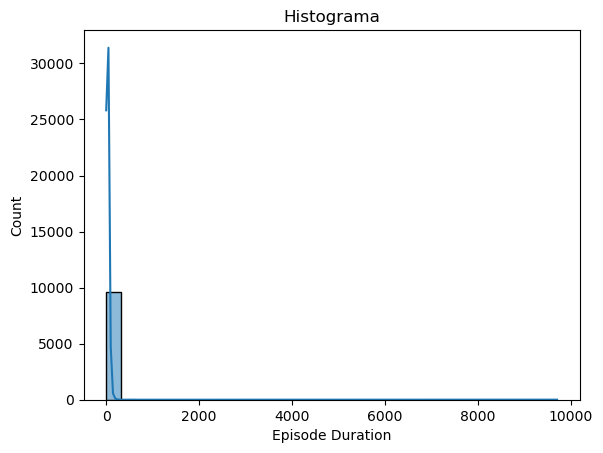

In [126]:
sns.histplot(data = df, x= "Episode Duration", bins = 30, kde = True)
plt.title(f"Histograma")

Text(0.5, 1.0, 'Boxplot')

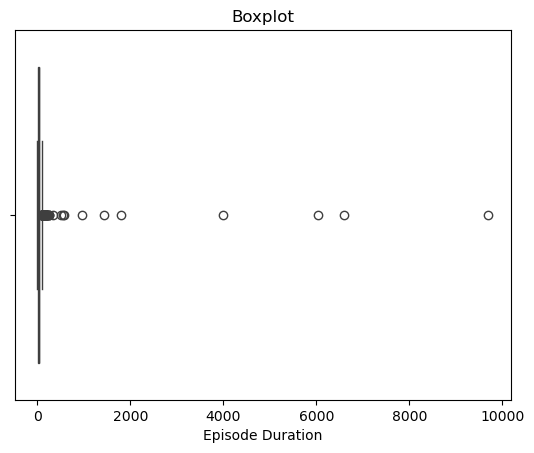

In [127]:
sns.boxplot(data = df, x="Episode Duration")
plt.title(f"Boxplot")

In [128]:
# lo convierto a int
df["Episode Duration"] = df["Episode Duration"].astype(int)

In [129]:
df.loc[[df["Episode Duration"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
5717,Boyei Gelo,"Set in the modern day Kolkata, tells the tale ...","Comedy, Drama, Family",NaN,70,NaN,English,India,2013-07-22,False,Ended,1,439,9700,No platforms available,No reviews,"Rohit Samanta, Basabdatta Chatterjee, Paran Ba...",https://image.tmdb.org/t/p/w500/evF3oS59JUMj7I...,No trailer available,2013


In [130]:
# la eliminamos
df.drop(df[df["Title"] == "Boyei Gelo"].index, inplace=True)


In [131]:
df.loc[[df["Episode Duration"].idxmax()]]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
6610,Bhootu,The story of a jolly little ghost.,"Comedy, Drama, Family",NaN,62,NaN,Bengali,India,2016-03-14,True,Returning Series,1,300,6600,No platforms available,No reviews,"Arshiya Mukherjee, Lily Chakravarty, Anindya C...",https://image.tmdb.org/t/p/w500/t95HSFtPdk7Fkf...,No trailer available,2016


In [132]:
# la eliminamos
df.drop(df[df["Title"] == "Bhootu"].index, inplace=True)

In [133]:
df.loc[df["Episode Duration"]>180]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
720,Morgenmagazin,NaN,"News, Talk",3.500,275,2.0,German,Germany,1992-07-19,True,Returning Series,34,3127,210,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500None,No trailer available,1992
1577,Live & Kicking,Live & Kicking was a BBC Saturday morning chil...,NaN,5.300,172,6.0,English,United Kingdom,1993-10-02,False,Ended,8,256,187,No platforms available,No reviews,"Sarah Cawood, Katy Hill, Emma Forbes, Jamie Th...",https://image.tmdb.org/t/p/w500/s7W5b3kBgcWBiN...,No trailer available,1993
3419,Sanremo Music Festival,The Sanremo Music Festival is the most popular...,"Family, Reality",7.600,101,14.0,Italian,Italy,1951-01-29,True,Returning Series,75,298,210,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/ohqDyr5Wx9jYx3...,No trailer available,1951
3890,Polskie drogi,NaN,"War & Politics, Drama",7.000,92,4.0,Polish,Poland,1977-10-16,False,Ended,1,11,949,No platforms available,No reviews,Karol Strasburger,https://image.tmdb.org/t/p/w500/dvAK2DuO89Yr56...,No trailer available,1977
4109,Viña del Mar International Song Festival,A yearly musical contest organized by the muni...,NaN,2.000,89,2.0,Spanish,Chile,1963-02-14,True,Returning Series,47,251,330,No platforms available,No reviews,"María Luisa Godoy, Martín Cárcamo",https://image.tmdb.org/t/p/w500/s6al1yprJ1CPlC...,No trailer available,1963
4272,Al Zeer Salem,A historical series embodying the character of...,Drama,8.000,86,4.0,Arabic,Syrian Arab Republic,2000-11-27,False,Ended,1,40,1800,Shahid VIP,No reviews,"Salloum Haddad, Abed Fahed, Rafic Ali Ahmad, K...",https://image.tmdb.org/t/p/w500/eLKGXpjV3GfCsl...,No trailer available,2000
5453,Solos,NaN,"Reality, Talk",5.500,72,2.0,Spanish,Spain,2020-09-14,True,Returning Series,4,161,1440,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/fcmHjfvk1c32dq...,No trailer available,2020
5468,Os Batanetes,NaN,Comedy,NaN,72,NaN,Portuguese,Portugal,2004-06-01,False,Ended,5,133,3990,Amazon Prime Video,No reviews,"Victor de Sousa, Rita Ribeiro, Inês Castel-Bra...",https://image.tmdb.org/t/p/w500/cNrrH8bXtEZPgL...,No trailer available,2004
5951,Mnet Asian Music Awards,Mnet Asian Music Awards (MAMA) is a major Sout...,Reality,9.500,67,2.0,Korean,"Korea, Republic of",2009-11-21,True,Returning Series,17,66,240,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/tPMpWQrQLnvosG...,No trailer available,2009
6307,Mani,Sky's parents hire an unconventional nanny nam...,Comedy,7.600,64,8.0,English,United States,2017-08-30,True,Returning Series,8,70,515,No platforms available,No reviews,"Lawrence Wayne Curry, Chelsea Lascher",https://image.tmdb.org/t/p/w500/fdEqveH0mIyZuD...,https://www.youtube.com/watch?v=erTURTFly6M,2017


In [134]:
df.loc[df["Title"] == "Polskie drogi", "Episode Duration"]= 85 # cambio el valor porque estaba mal /lo he buscado en internet

In [135]:
df.loc[df["Title"] == "Al Zeer Salem", "Episode Duration"]= 58 # cambio el valor porque estaba mal /lo he buscado en internet

In [136]:
df.loc[df["Title"] == "Solos", "Episode Duration"]= 150 # cambio el valor porque estaba mal /lo he buscado en internet

In [137]:
df.loc[df["Title"] == "Os Batanetes", "Episode Duration"]= 20 # cambio el valor porque estaba mal /lo he buscado en internet

In [138]:
df.loc[df["Title"] == "Mani", "Episode Duration"]= 12 # cambio el valor porque estaba mal /lo he buscado en internet

In [139]:
df.loc[df["Title"] == "The Whirlwind", "Episode Duration"]= 45 # cambio el valor porque estaba mal /lo he buscado en internet

elimino el resto

In [140]:
df.drop(df[df["Title"]== "Toward the Terra"].index, inplace = True)

In [141]:
df.drop(df[df["Title"]== "Tula Pahate Re"].index, inplace = True)

In [142]:
df.drop(df[df["Title"]== "Gaki no Tsukai No Laughing Batsu Game"].index, inplace = True)

In [143]:
df[df["Episode Duration"]== 0] # hay más de 1900 series sin duración de episodios

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
8,Squid Game,Hundreds of cash-strapped players accept a str...,"Action & Adventure, Mystery, Drama",7.900,1938,15382.0,Korean,"Korea, Republic of",2021-09-17,True,Returning Series,3,22,0,"Netflix basic with Ads, Netflix","Just totally worth it. | Visually excellent, t...","Lee Jung-jae, Lee Byung-hun, Yim Si-wan, Wi Ha...",https://image.tmdb.org/t/p/w500/1QdXdRYfktUSON...,https://www.youtube.com/watch?v=oqxAJKy0ii4,2021
15,Volta por Cima,NaN,"Soap, Drama, Comedy",6.500,1600,12.0,Portuguese,Brazil,2024-09-30,True,Returning Series,1,114,0,No platforms available,No reviews,"Jéssica Ellen, Fabrício Boliveira, Milhem Cort...",https://image.tmdb.org/t/p/w500/nyN8R0P1Hqwq7k...,No trailer available,2024
16,She's the One,"Beatriz Dourado, a young black woman marked by...","Soap, Drama",8.100,1591,9.0,Portuguese,Brazil,2024-11-04,True,Returning Series,1,95,0,No platforms available,No reviews,"Duda Santos, Pedro Novaes, Maisa Silva, Fábio ...",https://image.tmdb.org/t/p/w500/jFSkjQSZ5Td52i...,No trailer available,2024
21,Markus Lanz,TV presenter Markus Lanz invites prominent gue...,Talk,5.000,1468,10.0,German,Germany,2008-06-03,True,Returning Series,18,2042,0,No platforms available,No reviews,Markus Lanz,https://image.tmdb.org/t/p/w500/tr4cLn4ecRASV0...,No trailer available,2008
25,Brothers,Ador is a well known and respected CIDG Police...,"Drama, Action & Adventure",6.600,1414,33.0,Tagalog,Philippines,2015-09-28,False,Ended,9,2013,0,No platforms available,No reviews,"Coco Martin, Julia Montes, Susan Roces, Jaime ...",https://image.tmdb.org/t/p/w500/uX5ldo2snjJuZ8...,No trailer available,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,Roast,Roast is a Chinese stand-up comedy show. In ea...,"Comedy, Talk, Reality",7.400,44,5.0,Chinese,China,2017-01-08,False,Ended,5,51,0,No platforms available,No reviews,"Li Dan, Chen Zhuoxuan, Qin Hao, Wowkie Zhang, ...",https://image.tmdb.org/t/p/w500/jW6hKB6LF6rvva...,No trailer available,2017
9680,Second Spring,Second Spring was a television series in Turke...,"Family, Drama",8.600,44,29.0,Turkish,Türkiye,1998-10-29,False,Ended,3,37,0,No platforms available,No reviews,"Türkan Şoray, Şener Şen, Tarık Papuççuoğlu, Ne...",https://image.tmdb.org/t/p/w500/k3hxzYzovStb9I...,No trailer available,1998
9682,Sweet Diva,Maria da Paz is a committed baker who becomes ...,"Drama, Comedy, Crime, Soap",6.875,44,16.0,Portuguese,Brazil,2019-05-20,False,Ended,1,161,0,"Atresplayer Amazon Channel, Vix Gratis Amazon ...",No reviews,"Juliana Paes, Agatha Moreira, Nathalia Dill, P...",https://image.tmdb.org/t/p/w500/9WXkn39mIIOT9d...,No trailer available,2019
9685,Black Snow,"In 1995, seventeen-year-old Isabel Baker was m...",Crime,7.000,44,65.0,English,Australia,2023-01-01,True,Returning Series,2,12,0,"AMC+ Amazon Channel, MTV Katsomo, Spectrum On ...",No reviews,"Travis Fimmel, Jana McKinnon, Megan Smart, Dan...",https://image.tmdb.org/t/p/w500/8cYzv4vR2u4IA8...,https://www.youtube.com/watch?v=6gCM4Yhk-yc,2023


In [144]:
df["Title"] = df["Title"].str.lower()

# reemplazamos los valores 0 con los minutos reales

In [145]:
episode_duration= {
    'dexter': 50, 'game of thrones':60, 'the mentalist':40, 'ncis':44,
       'breaking bad':50, 'survivor':60, 'the blacklist':45, 'paradise':55,
       'shameless':50, 'desperate housewives':42, 'lost':43, 'bones':43, 'columbo':78,
       's.w.a.t.':43, 'the walking dead':50, 'fargo':52, 'the flash':43,
       'the late show with stephen colbert':46,
       'csi: crime scene investigation':43, 'community':20, 'stranger things':56,
       'two and a half men':22, 'the sopranos':60, 'the office':30, 'blue bloods':45,
       'seinfeld':24, 'seal team':43, 'the orville':44, 'better call saul':45,
       'newsradio':23, 'futurama':22, 'outlander':60, 'the x-files':50,
       'ghost whisperer':45, 'curb your enthusiasm':30,
       'buffy the vampire slayer':45, 'saturday night live':65,
       "rupaul's drag race":50, 'star trek: discovery':60, 'chernobyl':65,
       'mad men':47, 'jag':44, "tom clancy's jack ryan":60, 'westworld':60,
       "it's always sunny in philadelphia":20, 'web therapy':25,
       'star wars rebels':22, 'medium':45, 'arrested development':22, 'matlock':42,
       'succession':60, 'love, death & robots':15, 'orange is the new black':60,
       'mr. robot':60, 'narcos':50, 'the agency':50,
       'last week tonight with john oliver':32, 'in treatment':25,
       'the equalizer':44, 'what we do in the shadows':30, 'ozark':60, 'entourage':28,
       'days of our lives':60, 'shooter':41, 'little house on the prairie':60,
       'family ties':25, 'the umbrella academy':50, '13 reasons why':50,
       'house of cards':50, 'the marvelous mrs. maisel':57, 'justified':42,
       'deadliest catch':45, 'ballers':30, 'atlanta':30, 'honest trailers':7,
       'my name is earl':21, 'the leftovers':55, 'mindhunter':50, 'six feet under':55,
       'empire':42, 'bates motel':45, 'the six million dollar man':55,
       'naked and afraid':43, 'amazing stories':30, 'the ranch':30,
       'carpool karaoke: the series':18,
       'terminator: the sarah connor chronicles':43, 'the killing':50,
       'the life and legend of wyatt earp':30, 'life on mars':52, 'sense8':60,
       'battlestar galactica':44, 'masters of horror':60, 'the conners':22,
       'epic rap battles of history':5, 'russian doll':25,
       'naked and afraid xl':42, 'glow':35,'yellowstone':60, 'critical role':27, 'invincible':45, 'rt life':5,
       'paw patrol':22, 'severance':45, 'dexter: original sin':50,
       'from':50, 'beast games':50, 'the boys':60, 'animaniacs':23, 'the good doctor':42,
       'silo':50, 'high potential':43, 'young sheldon':20, 'the night agent':50,
       'teen wolf':43, 'hey qween!':38, 'euphoria':55, 'fear the walking dead':45,
       'lioness':45, 'house of the dragon':60, 'reacher':42,
       'the lord of the rings: the rings of power':60, 'arrow':43, 'snowfall':50,
       'arcane':45, 'xo, kitty':30, 'unhhhh':10, 'tulsa king':40, 'ted lasso':35,
       'the witcher':50, 'the jennifer hudson show':60, 'american primeval':50,
       'gossip girl':42, 'the 7d':30, 'the recruit':55, 'bridgerton':60, 'rwby chibi':11,
       'dune: prophecy':60, 'you':50, 'landman':55, 'what if...?':35, 'virgin river':45,
       'the white lotus':55, 'halo':60, '9-1-1: lone star':43,
       'mayor of kingstown':47, 'scorpion':40, 'wednesday':50,
       'white collar':42,'tracker':50, 'night gallery':50,
       'star wars: skeleton crew':40, 'see':54, 'the last of us':55, 'the penguin':60,
       'sex/life':45, 'lego ninjago: dragons rising':23, 'designated survivor':42,
       'common side effects':22, 'shōgun':60, 'hey! (ew)':30, 'tribunal justice':60,
       'mickey mouse clubhouse':23, 'vikings: valhalla':50,
       'the walking dead: daryl dixon':60, '1923':58, 'carnival row':55,
       'beverly hills, 90210':45, 'snowpiercer':45, 'castlevania':25,
       'the mandalorian':40, 'teacup':30, 'titans':45, 'dickinson':30,
       'the real housewives of beverly hills':43, 'the pitt':50,
       'narcos: mexico':60, 'mythic quest':30,
       'the walking dead: the ones who live':45, 'selling sunset':30, 'on call':30,
       'la fan':45, 'the summer i turned pretty':43, 'servant':30, 'wwe 24':30,
       'cupcake wars':42, 'battlefield friends':4, 'elsbeth':43,
       'the kardashians':40, 'karamo show':60, '1883':50, 'emily in paris':30,
       'schmigadoon!':30, 'the replacements':58, 'for all mankind':60,
       'loki':45, 'the wheel of time':60, 'obliterated':50,
       'agatha all along':40, 'the lincoln lawyer':50,
       'fire country':44, 'avatar the last airbender':60,
       'fallout':60, 'will trent':44, 'doc mcstuffins':24, 'creature commandos':23,
       'masters of the air':57, 'norman picklestripes':21, 'hawkeye':40,
       'the falcon and the winter soldier':50, 'highlander: the series':48,
       'the bold and the beautiful':22, 'mayfair witches':60, 'foundation':60,
       'looney tunes cartoons':10, 'invasion':55, 'school spirits':45,
       'peacemaker':43, 'cruel intentions':42, 'fresh off the boat':21,
       'little america':30, 'monsters':50,
       'chilling adventures of sabrina':57, 'shrinking':35, 'johnny bravo':22,
       'the morning show':55, 'wandavision':60, 'ikaw lamang':40,
       'castlevania: nocturne':27, 'only murders in the building':30,
       'the bear':37, 'rainbow high':10, "america's funniest home videos":38,
       'star wars: the bad batch':40, 'walker, texas ranger':43,
       "georgie & mandy's first marriage":20, 'star trek: picard':50,
       'goosebumps':22, 'sweet tooth':45, 'ncis: origins':43, 'cross':55,
       'raised by wolves':50, 'abbott elementary':22, 'one piece':23,
       'star trek: lower decks':30,
       'vindication':30, 'interior chinatown':40, 'the walking dead: dead city':44,
       'tell me lies':49, 'the sandman':50, 'the young turks':54, 'the dead zone':41,
       'superbuns':8, 'godfather of harlem':55, 'secret level':15, 'guidance':27,
       '3 body problem':50, 'disenchantment':30, 'the haunting of hill house':55,
       'my life with the walter boys':45, 'the madness':48, 'love, victor':24,
       'party down':30, 'the chi':60, 'el conde: amor y honor':60,
       "the queen's gambit":50, 'grown-ish':22, 'halloween wars':42,
        'knuckles':30, 'grotesquerie':45, "x-men '97":32,
       'presumed innocent':43, 'dark matter':43, 'roadkill':20,
       'american crime story':42, 'pawn stars':23, 'the irrational':42,
       'rooster teeth animated adventures':15,
       'star wars: andor':41, 'percy jackson and the olympians':40,
       'unusual suspects':42, 'dahmer - monster: the jeffrey dahmer story':50,
       'bossy bear':22, 'elena of avalor':25, 'the great':50, 'kingdom':50,
       'earth abides':52, 'say nothing':44, 'the rachel maddow show':60,
       'stargate origins':10, 'upload':32, 'a man on the inside':30,
       'she-hulk: attorney at law':35, 'those about to die':44, 'walker':42,
       'star trek: strange new worlds':55, 'adventure time: fionna & cake':27,
       'shape island':22, 'crown lake':30, "let's play minecraft":23,
       'monarch: legacy of monsters':60, 'the librarians':43,
       'dateline: unforgettable':85, 'bel-air':51,
       'bbq brawl':30, 'beauty in black':48, 'tabletop':32,
       'sausage party: foodtopia':25, 'the acolyte':40,
       'the shannara chronicles':42, 'the gilded age':54, 'pachinko':52,
       'black bird':58, 'the idol':50, 'the old man':55,
       'voltron: legendary defender':24, 'interview with the vampire':50,
       'ripley':55, 'pantheon':41, 'the flight attendant':45, 'world war two':45,
       'bookie':23, '61st street':45, 'nobody wants this':25, 'pupstruction':11,
       'sonic prime':26, 'poker face':58,
       "guillermo del toro's cabinet of curiosities":60, 'heels':58, 'the ark':43,
       'the continental: from the world of john wick':85, 'gayle':5,
       'sweat equity':20, 'tokyo vice':57, 'watchmen':59, 'ted':40,
       'expedition bigfoot':42, 'monsters at work':25, 'mr. corman':30,
       'the spiderwick chronicles':45, 'the terminal list':55,
       'smosh':5, 'american horror stories':43, 'yellowstone: one-fifty':40,
       'beef':35, 'maid':50, 'the angry video game nerd':30, 'joe pickett':48,
       'outer range':50, 'tumble leaf':22, 'unbelievable':50,
       'the mosquito coast':50, 'new york undercover':60,
       'rubble & crew':18, 'paradise run':23, 'and just like that…':40,
       'love is blind':55, 'acapulco':30, 'blue eye samurai':45, 'firefly lane':50,
       'life in pieces':22, 'human resources':28, "squid game":60
}

In [146]:
# Iteramos sobre las filas donde "Episode Duration" es 0
for index, row in df[df["Episode Duration"] == 0].iterrows():
    title = row["Title"]
    if title in episode_duration:
        # cambiamos el valor
        df.loc[df["Title"] == title, "Episode Duration"] = episode_duration[title]

In [147]:
df[df["Episode Duration"]== 0] # siguen siendo muchas 1563

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
15,volta por cima,NaN,"Soap, Drama, Comedy",6.500,1600,12.0,Portuguese,Brazil,2024-09-30,True,Returning Series,1,114,0,No platforms available,No reviews,"Jéssica Ellen, Fabrício Boliveira, Milhem Cort...",https://image.tmdb.org/t/p/w500/nyN8R0P1Hqwq7k...,No trailer available,2024
16,she's the one,"Beatriz Dourado, a young black woman marked by...","Soap, Drama",8.100,1591,9.0,Portuguese,Brazil,2024-11-04,True,Returning Series,1,95,0,No platforms available,No reviews,"Duda Santos, Pedro Novaes, Maisa Silva, Fábio ...",https://image.tmdb.org/t/p/w500/jFSkjQSZ5Td52i...,No trailer available,2024
21,markus lanz,TV presenter Markus Lanz invites prominent gue...,Talk,5.000,1468,10.0,German,Germany,2008-06-03,True,Returning Series,18,2042,0,No platforms available,No reviews,Markus Lanz,https://image.tmdb.org/t/p/w500/tr4cLn4ecRASV0...,No trailer available,2008
25,brothers,Ador is a well known and respected CIDG Police...,"Drama, Action & Adventure",6.600,1414,33.0,Tagalog,Philippines,2015-09-28,False,Ended,9,2013,0,No platforms available,No reviews,"Coco Martin, Julia Montes, Susan Roces, Jaime ...",https://image.tmdb.org/t/p/w500/uX5ldo2snjJuZ8...,No trailer available,2015
26,crazy about you,The story begins with the ambiguous relationsh...,"Soap, Drama, Mystery",5.400,1323,13.0,Portuguese,Brazil,2024-09-09,True,Returning Series,1,144,0,Globoplay,No reviews,"Gabz, Agatha Moreira, Chay Suede, Nicolas Prat...",https://image.tmdb.org/t/p/w500/xq1X6H8pupwx0j...,No trailer available,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,roast,Roast is a Chinese stand-up comedy show. In ea...,"Comedy, Talk, Reality",7.400,44,5.0,Chinese,China,2017-01-08,False,Ended,5,51,0,No platforms available,No reviews,"Li Dan, Chen Zhuoxuan, Qin Hao, Wowkie Zhang, ...",https://image.tmdb.org/t/p/w500/jW6hKB6LF6rvva...,No trailer available,2017
9680,second spring,Second Spring was a television series in Turke...,"Family, Drama",8.600,44,29.0,Turkish,Türkiye,1998-10-29,False,Ended,3,37,0,No platforms available,No reviews,"Türkan Şoray, Şener Şen, Tarık Papuççuoğlu, Ne...",https://image.tmdb.org/t/p/w500/k3hxzYzovStb9I...,No trailer available,1998
9682,sweet diva,Maria da Paz is a committed baker who becomes ...,"Drama, Comedy, Crime, Soap",6.875,44,16.0,Portuguese,Brazil,2019-05-20,False,Ended,1,161,0,"Atresplayer Amazon Channel, Vix Gratis Amazon ...",No reviews,"Juliana Paes, Agatha Moreira, Nathalia Dill, P...",https://image.tmdb.org/t/p/w500/9WXkn39mIIOT9d...,No trailer available,2019
9685,black snow,"In 1995, seventeen-year-old Isabel Baker was m...",Crime,7.000,44,65.0,English,Australia,2023-01-01,True,Returning Series,2,12,0,"AMC+ Amazon Channel, MTV Katsomo, Spectrum On ...",No reviews,"Travis Fimmel, Jana McKinnon, Megan Smart, Dan...",https://image.tmdb.org/t/p/w500/8cYzv4vR2u4IA8...,https://www.youtube.com/watch?v=6gCM4Yhk-yc,2023


1. creo un nuevo df que no tiene 0 en Episode Duration, pero me quedo con 8069 series

In [148]:
df_epdur = df[df["Episode Duration"]!= 0]

In [149]:
df_epdur # df donde ep duration no es nulo ni es 0 / 8069 series

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
0,gh dúo,NaN,Reality,7.3,2742,3.0,Spanish,Spain,2019-01-08,True,Returning Series,3,146,105,Tivify,No reviews,NaN,https://image.tmdb.org/t/p/w500/sgPv3qMYHKwxz9...,No trailer available,2019
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50,Netflix,No reviews,"Lu Yuxiao, Wang Xingyue, Ni Hongjie, Liu Xieni...",https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
2,love stories in the countryside,NaN,"Family, Comedy",6.5,2650,4.0,Chinese,China,2006-09-30,True,Returning Series,17,809,45,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",https://image.tmdb.org/t/p/w500/2XlU2bzsESbc6x...,No trailer available,2006
3,world news tonight with david muir,ABC World News is the flagship daily evening t...,News,5.5,2634,8.0,English,United States,1948-08-11,True,Returning Series,32,108,30,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/e5bUkDlEOqPR7M...,No trailer available,1948
4,running man,A reality and competition show where members a...,"Comedy, Reality",8.4,2416,180.0,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,15,739,85,"wavve, Rakuten Viki, Viu, OnDemandKorea, Watch...",No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",https://image.tmdb.org/t/p/w500/2Wmmu1MkqxJ48J...,No trailer available,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689,prince of wolf,"A little boy, who was rescued by a pack of wol...","Drama, Comedy",6.8,44,4.0,Chinese,"Taiwan, Province of China",2016-07-03,False,Ended,1,30,75,No platforms available,No reviews,"Derek Chang, Amber An, Samuel Ku, Katie Chen, ...",https://image.tmdb.org/t/p/w500/8xsBBMss7KsmGr...,No trailer available,2016
9691,the rolling girls,In a dystopian future where Japan's political ...,"Animation, Action & Adventure, Comedy, Sci-Fi ...",6.8,44,15.0,Japanese,Japan,2015-01-12,False,Ended,1,12,24,Hulu,No reviews,"Tomokazu Seki, Rina Hidaka, Risa Taneda, Ayumi...",https://image.tmdb.org/t/p/w500/9QuzoUebSW3xu6...,No trailer available,2015
9692,the heaven sword and dragon saber,The Heaven Sword and Dragon Saber is a Chinese...,"Drama, Action & Adventure",5.4,44,6.0,Chinese,China,2009-10-23,False,Ended,1,40,45,Watcha,No reviews,"Deng Chao, He Zhuoyan, Ady An, Zhang Meng, Liu...",https://image.tmdb.org/t/p/w500/aAG0fm0a6CfcrK...,No trailer available,2009
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...","Comedy, Drama",1.0,44,1.0,English,United States,2015-10-31,True,Returning Series,5,63,30,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",https://image.tmdb.org/t/p/w500/m4sGXOMMD4YIv6...,No trailer available,2015


2. Convierto los valores de Episode Duration = 0 a nulos

In [150]:
df["Episode Duration"] = np.where(df["Episode Duration"]== 0, np.nan, df["Episode Duration"])

In [151]:
df["Episode Duration"].value_counts(dropna=False)

Episode Duration
NaN      1563
45.0     1203
30.0      791
60.0      736
24.0      698
         ... 
123.0       1
117.0       1
139.0       1
87.0        1
73.0        1
Name: count, Length: 129, dtype: int64

In [152]:
df.loc[[df["Episode Duration"].idxmin()]] # es correcto, 
# one minute documentary that shows the behind the scenes journey of the South Korean girl group Loona in their pre-debut.

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
163,loona tv,"LOONA TV (이달의 소녀 탐구, Girl of the Month Inquiry...","Reality, Comedy",7.0,660,3.0,Korean,"Korea, Republic of",2016-10-12,False,Canceled,48,775,1.0,No platforms available,No reviews,"HeeJin, HyunJin, HaSeul, YeoJin, ViVi",https://image.tmdb.org/t/p/w500/i4afg3YM6wfdDs...,No trailer available,2016


In [153]:
df.describe()

,Rating,Popularity,Vote Count,First Air Date,Number of Season,Number of Episodes,Episode Duration,release_year
count,8042.000000,9632.000000,8042.000000,9632,9632.000000,9632.000000,8069.000000,9632.000000
mean,6.976049,126.651682,224.348545,2007-05-25 14:25:18.936877056,4.378738,175.340739,39.731937,2006.922446
min,0.500000,44.000000,1.000000,1944-01-20 00:00:00,1.000000,2.000000,1.000000,1944.000000
25%,6.200000,57.000000,3.000000,2001-04-02 18:00:00,1.000000,36.000000,24.000000,2001.000000
50%,7.258500,79.000000,10.000000,2011-10-02 12:00:00,2.000000,68.000000,39.000000,2011.000000
75%,8.000000,131.000000,85.000000,2018-02-23 06:00:00,5.000000,153.000000,49.000000,2018.000000
max,10.000000,2742.000000,24560.000000,2025-02-08 00:00:00,198.000000,9191.000000,330.000000,2025.000000
std,1.591423,159.116068,922.545462,NaN,7.162344,469.424153,22.525013,14.966217


In [154]:
df["In production"].value_counts(dropna=False) 

In production
False    7288
True     2344
Name: count, dtype: int64

In [155]:
df["Status"].value_counts()

Status
Ended               6880
Returning Series    2331
Canceled             408
In Production         11
Planned                2
Name: count, dtype: int64

In [156]:
df[df["Status"]== "Planned"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
353,cool kiz on the block,Cool Kiz on the Block or Our Neighborhood arts...,"Reality, Comedy",NaN,411,NaN,Korean,"Korea, Republic of",2013-04-09,True,Planned,1,174,NaN,wavve,No reviews,Kang Ho-dong,https://image.tmdb.org/t/p/w500/xHIqMawNd8pLbo...,No trailer available,2013
5182,快乐东西,NaN,"Animation, Comedy, Family",NaN,75,NaN,Chinese,China,2003-01-01,True,Planned,7,420,NaN,No platforms available,No reviews,"Han Tongsheng, Jiang Guangtao",https://image.tmdb.org/t/p/w500/5yDAraknEuaBtm...,No trailer available,2003


In [157]:
df[df["Status"]== "In Production"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
1281,homo zapping,NaN,"Comedy, Family",NaN,195,NaN,Spanish,Spain,2003-12-09,True,In Production,3,132,30.0,"Atres Player, Atresplayer Amazon Channel",No reviews,"Elías Torrecillas, Paloma Jiménez, Carles Roig...",https://image.tmdb.org/t/p/w500/uSXMeUcVRJ41Gq...,No trailer available,2003
2470,video star,Four female hosts blend quick quips and laught...,Talk,NaN,129,NaN,Korean,"Korea, Republic of",2016-07-12,True,In Production,2,68,81.0,"wavve, Watcha",No reviews,"Park So-hyun, Kim Sook, Park Na-rae, Sunny, Sa...",https://image.tmdb.org/t/p/w500/4sKOJdzo4tmzL0...,No trailer available,2016
3690,school 4,The KBS youth drama is about the lives of the ...,Drama,NaN,96,NaN,Korean,"Korea, Republic of",2001-04-08,True,In Production,1,48,NaN,OnDemandKorea,No reviews,"Lim Soo-jung, Yeo Wook-hwan, Lee Sang-in-I, Le...",https://image.tmdb.org/t/p/w500/9oZSYv1jHmPWQa...,No trailer available,2001
4310,ano-chan no den den denpa,🗣Ano-chan opens a TV station at home\n\nUnpred...,"Talk, Comedy",NaN,86,NaN,Japanese,Japan,2023-04-20,True,In Production,1,62,30.0,No platforms available,No reviews,"ano, Soshina",https://image.tmdb.org/t/p/w500/jVtkqgaLXD7a6Y...,No trailer available,2023
4441,rosa fogo,Rosa Fogo is a Portuguese soap opera that aire...,Drama,NaN,84,NaN,English,Portugal,2011-09-19,True,In Production,1,164,45.0,No platforms available,No reviews,"Cláudia Vieira, Ângelo Rodrigues, José Fidalgo...",https://image.tmdb.org/t/p/w500/40EyMqGiVG3duj...,No trailer available,2011
6455,un mundo sin...,NaN,"Comedy, Animation",NaN,63,NaN,Spanish,Argentina,2019-09-03,True,In Production,3,18,2.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/ouXy8UeOm4Z1Qz...,No trailer available,2019
6828,planeta calleja,NaN,NaN,NaN,60,NaN,Spanish,Spain,2014-04-13,True,In Production,12,82,60.0,No platforms available,No reviews,Jesús Calleja,https://image.tmdb.org/t/p/w500/eZAf0Sz0DRnFmr...,No trailer available,2014
7560,striscia la notizia,Striscia la notizia is an Italian television p...,"Comedy, News",NaN,55,NaN,Italian,Italy,1988-11-07,True,In Production,32,4279,45.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/x4QByhE7lOMtUT...,No trailer available,1988
7805,zig and sharko,On a desert island lives a starving hyena with...,"Family, Comedy, Animation",NaN,54,NaN,French,France,2010-12-21,True,In Production,4,312,7.0,"Amazon Prime Video with Ads, Now TV, Discovery...",No reviews,NaN,https://image.tmdb.org/t/p/w500/cdnKMeCCji3nA5...,https://www.youtube.com/watch?v=YizT9yU194s,2010
8329,georgia's got talent!,Georgian version of the Got Talent series. Sin...,Reality,NaN,51,NaN,Georgian,Georgia,2010-02-01,True,In Production,9,134,45.0,No platforms available,No reviews,"Nika Gvaramia, Nanuka Zhorzholiani, Vano Tarkh...",https://image.tmdb.org/t/p/w500None,No trailer available,2010


In [158]:
# elimino las series que están in production y planned
df.drop(df[df["Status"].isin(["In Production", "Planned"])].index, inplace=True)

In [159]:
df["Status"].value_counts(dropna=False)

Status
Ended               6880
Returning Series    2331
Canceled             408
Name: count, dtype: int64

In [160]:
df

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
0,gh dúo,NaN,Reality,7.3,2742,3.0,Spanish,Spain,2019-01-08,True,Returning Series,3,146,105.0,Tivify,No reviews,NaN,https://image.tmdb.org/t/p/w500/sgPv3qMYHKwxz9...,No trailer available,2019
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,Netflix,No reviews,"Lu Yuxiao, Wang Xingyue, Ni Hongjie, Liu Xieni...",https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
2,love stories in the countryside,NaN,"Family, Comedy",6.5,2650,4.0,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",https://image.tmdb.org/t/p/w500/2XlU2bzsESbc6x...,No trailer available,2006
3,world news tonight with david muir,ABC World News is the flagship daily evening t...,News,5.5,2634,8.0,English,United States,1948-08-11,True,Returning Series,32,108,30.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/e5bUkDlEOqPR7M...,No trailer available,1948
4,running man,A reality and competition show where members a...,"Comedy, Reality",8.4,2416,180.0,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,15,739,85.0,"wavve, Rakuten Viki, Viu, OnDemandKorea, Watch...",No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",https://image.tmdb.org/t/p/w500/2Wmmu1MkqxJ48J...,No trailer available,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9690,我们生活的年代,NaN,Drama,7.0,44,1.0,Chinese,China,2008-09-24,False,Ended,1,29,NaN,No platforms available,No reviews,"Liu Ye, Yi Sha, Li Guangjie, Zhao Ziqi, Li Qian",https://image.tmdb.org/t/p/w500/fUuzlUdxy0IKDh...,No trailer available,2008
9691,the rolling girls,In a dystopian future where Japan's political ...,"Animation, Action & Adventure, Comedy, Sci-Fi ...",6.8,44,15.0,Japanese,Japan,2015-01-12,False,Ended,1,12,24.0,Hulu,No reviews,"Tomokazu Seki, Rina Hidaka, Risa Taneda, Ayumi...",https://image.tmdb.org/t/p/w500/9QuzoUebSW3xu6...,No trailer available,2015
9692,the heaven sword and dragon saber,The Heaven Sword and Dragon Saber is a Chinese...,"Drama, Action & Adventure",5.4,44,6.0,Chinese,China,2009-10-23,False,Ended,1,40,45.0,Watcha,No reviews,"Deng Chao, He Zhuoyan, Ady An, Zhang Meng, Liu...",https://image.tmdb.org/t/p/w500/aAG0fm0a6CfcrK...,No trailer available,2009
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...","Comedy, Drama",1.0,44,1.0,English,United States,2015-10-31,True,Returning Series,5,63,30.0,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",https://image.tmdb.org/t/p/w500/m4sGXOMMD4YIv6...,No trailer available,2015


In [161]:
df.to_csv("Dataset/df_analisis_general1.csv") # uso este df para el analisis general en Tableau

3. Pruebo a reemplazar los valores de Episode Duration iguales a 0 con la media por género y por País

In [162]:
df[["Genero"]] # tengo los generos en una string juntos ["Talk, Comedy, News"]

,Genero
0,Reality
1,Drama
2,"Family, Comedy"
3,News
4,"Comedy, Reality"
...,...
9690,Drama
9691,"Animation, Action & Adventure, Comedy, Sci-Fi ..."
9692,"Drama, Action & Adventure"
9693,"Comedy, Drama"


In [163]:
# antes de poder hacer el explode tengo que hacer el split
df["Genero"] = df["Genero"].apply(lambda x: x.split(', ') if isinstance(x, str) else x)


In [164]:
df[["Genero"]] # ahora los generos son listas de strings ["Talk", "Comedy", "News"]

,Genero
0,[Reality]
1,[Drama]
2,"[Family, Comedy]"
3,[News]
4,"[Comedy, Reality]"
...,...
9690,[Drama]
9691,"[Animation, Action & Adventure, Comedy, Sci-Fi..."
9692,"[Drama, Action & Adventure]"
9693,"[Comedy, Drama]"


In [165]:
df_expanded = df.explode("Genero") # separo los generos dentro de una misma serie
df_expanded.sample(2)

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
9079,how not to summon a demon lord,When it comes to the fantasy MMORPG Cross Reve...,Sci-Fi & Fantasy,7.9,47,301.0,Japanese,Japan,2018-07-05,False,Ended,2,22,24.0,"Anime Times Amazon Channel, Crunchyroll, Catch...",No reviews,"Masaaki Mizunaka, Atsumi Tanezaki, Azumi Waki,...",https://image.tmdb.org/t/p/w500/oVozVLWMTej4CR...,https://www.youtube.com/watch?v=puaffx0eIkg,2018
1652,gabriela,Naïve and provocative Gabriela is a raggedy mi...,Comedy,7.1,168,24.0,Portuguese,Brazil,2012-06-18,False,Ended,1,77,45.0,No platforms available,No reviews,"Juliana Paes, Humberto Martins, Mateus Solano,...",https://image.tmdb.org/t/p/w500/dOw8Gl2ZcBqiLa...,No trailer available,2012


In [166]:
df_expanded.shape

(19120, 20)

In [167]:
df_expanded["Genero"]

0                Reality
1                  Drama
2                 Family
2                 Comedy
3                   News
              ...       
9693              Comedy
9693               Drama
9694           Animation
9694    Sci-Fi & Fantasy
9694              Comedy
Name: Genero, Length: 19120, dtype: object

In [168]:
avg_duration_genre_country = df_expanded[df_expanded["Episode Duration"] != 0].groupby(["Genero", "Origin Country"])["Episode Duration"].mean()
avg_duration_genre_country

Genero              Origin Country
Action & Adventure  Argentina         52.500000
                    Australia         43.714286
                    Austria           45.000000
                    Belgium           41.666667
                    Brazil            46.545455
                                        ...    
Western             Brazil            45.000000
                    France            38.000000
                    Germany           25.000000
                    Japan             25.000000
                    United States     45.520833
Name: Episode Duration, Length: 636, dtype: float64

In [169]:
df_expanded["Episode Duration"].value_counts(dropna=False)

Episode Duration
NaN      2534
45.0     2060
24.0     2051
25.0     1717
30.0     1389
         ... 
117.0       1
93.0        1
123.0       1
92.0        1
87.0        1
Name: count, Length: 129, dtype: int64

In [170]:
def duration_0(fila): # quiero reemplazar la duración 0 por la media por pais y por genero
    if pd.isna(fila["Episode Duration"]) or fila["Episode Duration"] == 0:
        generos = fila["Genero"]       
        pais = fila["Origin Country"]
        # calculamos la media por genero y pais
        avg = avg_duration_genre_country.get((generos, pais), None)
        if avg is not None:
            return avg
        else: # si no usamos la media global
            return df[df["Episode Duration"].notnull()]["Episode Duration"].mean()
    return fila["Episode Duration"]

In [171]:
# aplicamos la función al df en el que he hecho el exploded de los generos
df_expanded["Episode Duration"] = df_expanded.apply(duration_0, axis=1)

In [172]:
df_expanded[df_expanded["Episode Duration"]== 0] # ya no tengo

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year


In [173]:
df_expanded["In production"].value_counts()

In production
False    14906
True      4214
Name: count, dtype: int64

In [174]:
df_expanded["Status"].value_counts()

Status
Ended               14107
Returning Series     4214
Canceled              799
Name: count, dtype: int64

In [175]:
df_expanded.to_csv("Dataset/df_analisis_general.csv", sep="@") # en este df los nans de Rating los he sustituido con la media de rating por genero y pais

In [176]:
df_expanded["Origin Country"].value_counts()

Origin Country
Japan                                     5032
United States                             4279
China                                     1613
Korea, Republic of                        1490
United Kingdom                             802
                                          ... 
Montenegro                                   1
Bosnia and Herzegovina                       1
Dominican Republic                           1
Korea, Democratic People's Republic of       1
Latvia                                       1
Name: count, Length: 80, dtype: int64

### GENERO, WHERE TO WATCH, CAST, REVIEWS

### Analisis Genero

In [177]:
# quiero sacar los generos unicos
df["Genero"] # los generos son listas de strings ["Talk", "Comedy", "News"]

0                                               [Reality]
1                                                 [Drama]
2                                        [Family, Comedy]
3                                                  [News]
4                                       [Comedy, Reality]
                              ...                        
9690                                              [Drama]
9691    [Animation, Action & Adventure, Comedy, Sci-Fi...
9692                          [Drama, Action & Adventure]
9693                                      [Comedy, Drama]
9694                [Animation, Sci-Fi & Fantasy, Comedy]
Name: Genero, Length: 9619, dtype: object

In [178]:
# divido los generos combinados en filas separadas
generos_exploded = df.explode("Genero")
generos_exploded["Genero"]# separo los generos para que en la serie haya un unico genero

0                Reality
1                  Drama
2                 Family
2                 Comedy
3                   News
              ...       
9693              Comedy
9693               Drama
9694           Animation
9694    Sci-Fi & Fantasy
9694              Comedy
Name: Genero, Length: 19120, dtype: object

In [179]:
# cuento los generos unicos
generos_count = generos_exploded["Genero"].value_counts()
generos_count.columns = ['Genero', 'Total']
generos_count # 18642

Genero
Drama                 4679
Comedy                3008
Animation             2136
Action & Adventure    1654
Sci-Fi & Fantasy      1503
Family                1112
Crime                  836
Mystery                687
Kids                   668
Reality                633
Soap                   612
Talk                   410
Documentary            265
War & Politics         180
News                   117
Western                 56
Desconocido             46
Name: count, dtype: int64

In [180]:
# agrupamos los generos en 7
agrupacion_generos = {
    "Crime": "Drama",
    "Sci-Fi & Fantasy": "Action & Adventure",
    "Mystery": "Action & Adventure", 
    "Reality": "Entertainment",
    "Kids": "Family",
    "Talk": "Entertainment",
    "Western": "Documentary",
    "Soap": "Drama",
    "War & Politics": "Documentary",
    "News":"Entertainment",
    "Desconocido": "Entertainment"}

# Generos finales:
- Action & Adventure
- Animation
- Family
- Comedy
- Drama
- Entertainment
- Documentary

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9619 entries, 0 to 9694
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Title               9619 non-null   object        
 1   Synopsis            8019 non-null   object        
 2   Genero              9101 non-null   object        
 3   Rating              8042 non-null   float64       
 4   Popularity          9619 non-null   int64         
 5   Vote Count          8042 non-null   float64       
 6   Original Language   9619 non-null   object        
 7   Origin Country      9619 non-null   object        
 8   First Air Date      9619 non-null   datetime64[ns]
 9   In production       9619 non-null   bool          
 10  Status              9619 non-null   object        
 11  Number of Season    9619 non-null   int64         
 12  Number of Episodes  9619 non-null   int64         
 13  Episode Duration    8060 non-null   float64       
 1

Antes de aplicar la función tengo que eliminar los nulos


In [182]:
df_genero = df.copy()

In [183]:
df_genero.dropna(subset=["Genero"], inplace = True)

In [184]:
df_genero["Genero"].isna().sum()

0

In [185]:
df_genero["Genero"] = df_genero["Genero"].apply(  # agrupo los generos en las 7 categorias
    lambda genero: list(set([agrupacion_generos[i] if i in agrupacion_generos else i for i in genero])))


In [186]:
df_genero["Genero"].value_counts()

Genero
[Drama]                                                       2178
[Entertainment]                                                726
[Comedy]                                                       594
[Comedy, Drama]                                                559
[Drama, Action & Adventure]                                    525
                                                              ... 
[Documentary, Entertainment, Family]                             1
[Comedy, Entertainment, Drama, Action & Adventure]               1
[Comedy, Action & Adventure, Drama, Family, Entertainment]       1
[Documentary, Entertainment, Action & Adventure, Drama]          1
[Documentary, Family, Comedy]                                    1
Name: count, Length: 98, dtype: int64

In [187]:
df_genero = df_genero.explode("Genero")
df_genero

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
0,gh dúo,NaN,Entertainment,7.3,2742,3.0,Spanish,Spain,2019-01-08,True,Returning Series,3,146,105.0,Tivify,No reviews,NaN,https://image.tmdb.org/t/p/w500/sgPv3qMYHKwxz9...,No trailer available,2019
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,Netflix,No reviews,"Lu Yuxiao, Wang Xingyue, Ni Hongjie, Liu Xieni...",https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
2,love stories in the countryside,NaN,Comedy,6.5,2650,4.0,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",https://image.tmdb.org/t/p/w500/2XlU2bzsESbc6x...,No trailer available,2006
2,love stories in the countryside,NaN,Family,6.5,2650,4.0,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",https://image.tmdb.org/t/p/w500/2XlU2bzsESbc6x...,No trailer available,2006
3,world news tonight with david muir,ABC World News is the flagship daily evening t...,Entertainment,5.5,2634,8.0,English,United States,1948-08-11,True,Returning Series,32,108,30.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/e5bUkDlEOqPR7M...,No trailer available,1948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...",Comedy,1.0,44,1.0,English,United States,2015-10-31,True,Returning Series,5,63,30.0,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",https://image.tmdb.org/t/p/w500/m4sGXOMMD4YIv6...,No trailer available,2015
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...",Drama,1.0,44,1.0,English,United States,2015-10-31,True,Returning Series,5,63,30.0,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",https://image.tmdb.org/t/p/w500/m4sGXOMMD4YIv6...,No trailer available,2015
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Comedy,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,"U-NEXT, Crunchyroll Amazon Channel, Crunchyroll",No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Action & Adventure,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,"U-NEXT, Crunchyroll Amazon Channel, Crunchyroll",No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006


In [188]:
df_genero["Genero"].value_counts() # hay series con más de un genero

Genero
Drama                 5043
Comedy                3008
Action & Adventure    2731
Animation             2136
Family                1533
Entertainment         1098
Documentary            497
Name: count, dtype: int64

In [189]:
df_genero.groupby("Origin Country").size()

Origin Country
Argentina                              79
Australia                             109
Austria                                31
Bangladesh                              5
Belgium                                75
                                     ... 
Ukraine                                17
United Arab Emirates                    3
United Kingdom                        625
United States                        3533
Venezuela, Bolivarian Republic of      34
Length: 78, dtype: int64

In [190]:
df_genero.to_csv("Dataset/df_analisis_generos.csv") # uso este df para el analisis de los generos en Tableau

### STATISTICS

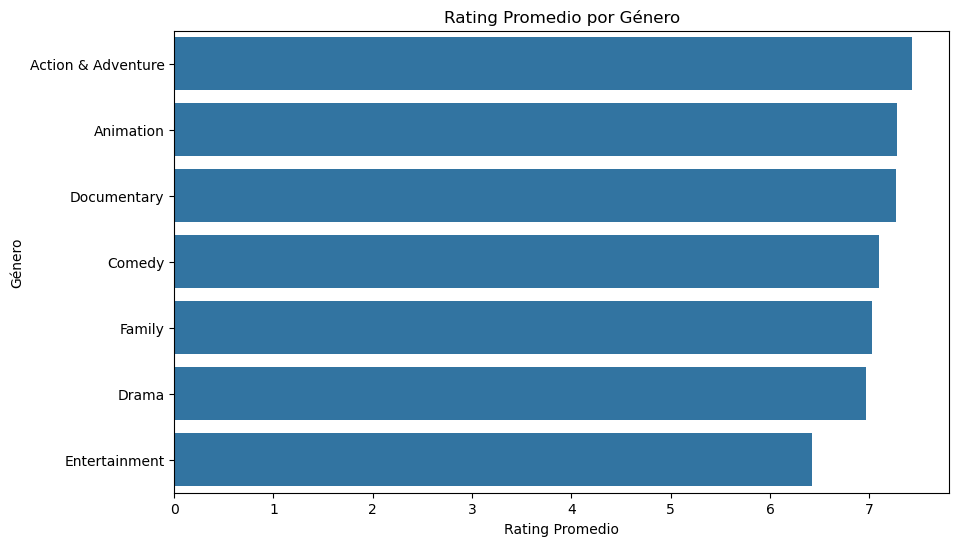

In [191]:
genero_rating = df_genero.groupby("Genero")["Rating"].mean().reset_index()

# Visualización de rating promedio por género
plt.figure(figsize=(10, 6))
sns.barplot(x="Rating", y="Genero", data=genero_rating.sort_values("Rating", ascending=False))
plt.title("Rating Promedio por Género")
plt.xlabel("Rating Promedio")
plt.ylabel("Género")
plt.xticks()
plt.show()

In [192]:
stats_genero = df_genero.groupby("Genero").agg({"Rating": ["mean", "count"], "Vote Count": "sum"}).reset_index()
stats_genero

Genero    Rating       Vote Count
                           mean count        sum
0  Action & Adventure  7.431896  2551  1096070.0
1           Animation  7.283066  1996   430096.0
2              Comedy  7.100602  2755   550966.0
3         Documentary  7.270231   425    57611.0
4               Drama  6.967152  4247  1245461.0
5       Entertainment  6.424674   906    30173.0
6              Family  7.024133  1321   185011.0

In [193]:
stats_genero.columns = ["Genero", "Media de rating", "Num series", "suma de vote count"]
# ordenar por número de series
stats_genero = stats_genero.sort_values(by = "Num series", ascending=False)
stats_genero.sort_values(by="Media de rating", ascending=False)

,Genero,Media de rating,Num series,suma de vote count
0,Action & Adventure,7.431896,2551,1096070.0
1,Animation,7.283066,1996,430096.0
3,Documentary,7.270231,425,57611.0
2,Comedy,7.100602,2755,550966.0
6,Family,7.024133,1321,185011.0
4,Drama,6.967152,4247,1245461.0
5,Entertainment,6.424674,906,30173.0


In [194]:
stats_genero2 = df_genero.groupby("Origin Country").agg({"Rating": ["mean", "count"], "Genero": lambda x: x.mode()[0]}).reset_index()
stats_genero2.columns = ["Origin Country", "Media de rating", "Num series", "Genero más común"]
stats_genero2["Origin Country"] = stats_genero2["Origin Country"].str.split(',').str[0]
stats_genero2 = stats_genero2.drop_duplicates(subset="Origin Country")
stats_genero2 = stats_genero2.sort_values(by = "Num series", ascending=False)
stats_genero2

,Origin Country,Media de rating,Num series,Genero más común
36,Japan,7.423796,3929,Animation
76,United States,7.206028,3469,Drama
12,China,7.532783,1177,Drama
39,Korea,6.699464,1165,Drama
75,United Kingdom,6.721926,585,Drama
...,...,...,...,...
55,Puerto Rico,5.700000,1,Drama
32,Iraq,9.000000,1,Comedy
38,Kazakhstan,NaN,0,Drama
40,Latvia,NaN,0,Drama


### Analisis Actores

In [195]:
df["Cast"].isna().sum()


510

In [196]:
# cogemos todos los paises Gonza

In [197]:
df_actores = df_genero.copy()

In [198]:
df_actores.dropna(subset=["Cast"], inplace=True)
df_actores["Cast"].isna().sum()
df_actores

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,Netflix,No reviews,"Lu Yuxiao, Wang Xingyue, Ni Hongjie, Liu Xieni...",https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
2,love stories in the countryside,NaN,Comedy,6.5,2650,4.0,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",https://image.tmdb.org/t/p/w500/2XlU2bzsESbc6x...,No trailer available,2006
2,love stories in the countryside,NaN,Family,6.5,2650,4.0,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",https://image.tmdb.org/t/p/w500/2XlU2bzsESbc6x...,No trailer available,2006
4,running man,A reality and competition show where members a...,Comedy,8.4,2416,180.0,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,15,739,85.0,"wavve, Rakuten Viki, Viu, OnDemandKorea, Watch...",No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",https://image.tmdb.org/t/p/w500/2Wmmu1MkqxJ48J...,No trailer available,2010
4,running man,A reality and competition show where members a...,Entertainment,8.4,2416,180.0,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,15,739,85.0,"wavve, Rakuten Viki, Viu, OnDemandKorea, Watch...",No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",https://image.tmdb.org/t/p/w500/2Wmmu1MkqxJ48J...,No trailer available,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...",Comedy,1.0,44,1.0,English,United States,2015-10-31,True,Returning Series,5,63,30.0,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",https://image.tmdb.org/t/p/w500/m4sGXOMMD4YIv6...,No trailer available,2015
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...",Drama,1.0,44,1.0,English,United States,2015-10-31,True,Returning Series,5,63,30.0,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",https://image.tmdb.org/t/p/w500/m4sGXOMMD4YIv6...,No trailer available,2015
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Comedy,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,"U-NEXT, Crunchyroll Amazon Channel, Crunchyroll",No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Action & Adventure,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,"U-NEXT, Crunchyroll Amazon Channel, Crunchyroll",No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006


In [199]:
df_actores = df_actores.explode("Cast")# no puedo hacer explode, tengo que hacer split antes
df_actores

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,Netflix,No reviews,"Lu Yuxiao, Wang Xingyue, Ni Hongjie, Liu Xieni...",https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
2,love stories in the countryside,NaN,Comedy,6.5,2650,4.0,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",https://image.tmdb.org/t/p/w500/2XlU2bzsESbc6x...,No trailer available,2006
2,love stories in the countryside,NaN,Family,6.5,2650,4.0,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",https://image.tmdb.org/t/p/w500/2XlU2bzsESbc6x...,No trailer available,2006
4,running man,A reality and competition show where members a...,Comedy,8.4,2416,180.0,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,15,739,85.0,"wavve, Rakuten Viki, Viu, OnDemandKorea, Watch...",No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",https://image.tmdb.org/t/p/w500/2Wmmu1MkqxJ48J...,No trailer available,2010
4,running man,A reality and competition show where members a...,Entertainment,8.4,2416,180.0,Korean,"Korea, Republic of",2010-07-11,True,Returning Series,15,739,85.0,"wavve, Rakuten Viki, Viu, OnDemandKorea, Watch...",No reviews,"Yoo Jae-suk, Jee Seok-jin, Kim Jong-kook, Haha...",https://image.tmdb.org/t/p/w500/2Wmmu1MkqxJ48J...,No trailer available,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...",Comedy,1.0,44,1.0,English,United States,2015-10-31,True,Returning Series,5,63,30.0,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",https://image.tmdb.org/t/p/w500/m4sGXOMMD4YIv6...,No trailer available,2015
9693,skeleton crew,"This is the story of Hunter and Anthony, a bea...",Drama,1.0,44,1.0,English,United States,2015-10-31,True,Returning Series,5,63,30.0,No platforms available,No reviews,"Joshua R. Pangborn, Johnathan Cerio, Ashley Mo...",https://image.tmdb.org/t/p/w500/m4sGXOMMD4YIv6...,No trailer available,2015
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Comedy,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,"U-NEXT, Crunchyroll Amazon Channel, Crunchyroll",No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Action & Adventure,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,"U-NEXT, Crunchyroll Amazon Channel, Crunchyroll",No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006


In [200]:
# Verifico el tipo de los datos en "Cast"
print(df_actores["Cast"].apply(type)) # son una string, tengo que hacer split

1       <class 'str'>
2       <class 'str'>
2       <class 'str'>
4       <class 'str'>
4       <class 'str'>
            ...      
9693    <class 'str'>
9693    <class 'str'>
9694    <class 'str'>
9694    <class 'str'>
9694    <class 'str'>
Name: Cast, Length: 15338, dtype: object


In [201]:
df_actores["Cast"].value_counts()

Cast
Haruka Tomatsu, Koki Uchiyama, Seiichiro Yamashita, Yurie Kozakai, Nobuhiko Okamoto                  6
Sumire Morohoshi, Ayaka Ohashi, Azusa Tadokoro, Aya Suzaki, Minako Kotobuki                          5
Ayana Taketatsu, Saori Hayami, Rie Tanaka, Sayuri Yahagi, Kana Asumi                                 5
Kouta Satou, Soichiro Hoshi, Mai Nakahara, Mana Hirata, Kaoru Mizuhara                               5
Yuuki Temma, Mirai Hinata, Ryouko Jyuni, Rian Toda, Momoka Ishii                                     5
                                                                                                    ..
José Wilker, Marília Pêra, Wagner Moura, Débora Falabella, José de Abreu                             1
Kevin Bacon, James Purefoy, Shawn Ashmore, Jessica Stroup, Sam Underwood                             1
Lin Yun, Song Weilong, Peter Ho, David Wang, Li Xinai                                                1
Michalis Leventogiannis, Martha Lambiri-Fedorów, Pavlos Orkopoulos, 

In [202]:
# los tengo que pasar a lista
# Convertir las strings separadas por comas a listas
df_actores["Cast"] = df_actores["Cast"].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

In [203]:
# ahora puedo aplicar el explode
df_actores = df_actores.explode("Cast")
# elimino la columna de plataformas porque me está creando problemas
df_actores.drop(columns = ["Where to Watch"], inplace=True)

In [204]:
df_actores["Cast"].isna().sum() 


0

In [205]:
df_actores # por cada serie tenemos los primeros 5 actores principales

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Reviews,Cast,Poster,Trailer,release_year
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,No reviews,Lu Yuxiao,https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,No reviews,Wang Xingyue,https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,No reviews,Ni Hongjie,https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,No reviews,Liu Xiening,https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,No reviews,Chen Heyi,https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Animation,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,No reviews,Hironori Miyata,https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Animation,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,No reviews,Tomoe Hanba,https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Animation,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,No reviews,Tomomichi Nishimura,https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Animation,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,No reviews,Kaori Mizuhashi,https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006


In [206]:
df_actores.drop(columns=["Reviews"], inplace = True)

In [207]:
df_actores.to_csv("Dataset/df_analisis_actores.csv", sep="@") # este es el df que usaré para el analisis de actores
#por qué si no hay nulos, cuando lo exporto a Tableau me aparecen nulos en Cast??

In [208]:
df_actores

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Cast,Poster,Trailer,release_year
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,Lu Yuxiao,https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,Wang Xingyue,https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,Ni Hongjie,https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,Liu Xiening,https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,Chen Heyi,https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Animation,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,Hironori Miyata,https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Animation,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,Tomoe Hanba,https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Animation,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,Tomomichi Nishimura,https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Animation,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,Kaori Mizuhashi,https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006


### STATISTICS

In [209]:
# sacamos el rating promedio por actor
actor_rating = df_actores.groupby("Cast")["Rating"].mean().reset_index()
actor_rating.rename(columns = {"Rating": "Avg_rating"}, inplace=True)
print(actor_rating)

                      Cast  Avg_rating
0      "Weird Al" Yankovic       6.100
1                     A-in         NaN
2             A.J. Buckley       8.000
3               A.J. Lamas         NaN
4            A.J. LoCascio       7.337
...                    ...         ...
23292                  임진웅       7.700
23293                  임형찬         NaN
23294                  정진욱         NaN
23295                  조수지         NaN
23296                  홍수민       5.800

[23297 rows x 2 columns]


In [210]:
# sacamos el genero más común por actor
actor_genero = df_actores.groupby("Cast")["Genero"].apply(lambda x: x.mode()[0] if not x.mode().empty else "Unknown").reset_index()
actor_genero.rename(columns = {"Genero": "Most_common_genre"}, inplace=True)

print(actor_genero)

                      Cast   Most_common_genre
0      "Weird Al" Yankovic              Comedy
1                     A-in               Drama
2             A.J. Buckley  Action & Adventure
3               A.J. Lamas               Drama
4            A.J. LoCascio  Action & Adventure
...                    ...                 ...
23292                  임진웅  Action & Adventure
23293                  임형찬              Family
23294                  정진욱              Comedy
23295                  조수지              Family
23296                  홍수민               Drama

[23297 rows x 2 columns]


In [211]:
# sacamos el pais más común por actor
actor_pais = df_actores.groupby("Cast")["Origin Country"].apply(lambda x: x.mode()[0] if not x.mode().empty else "Unknown").reset_index()
actor_pais.rename(columns = {"Origin Country": "Most_common_country"}, inplace=True)

print(actor_pais)

                      Cast Most_common_country
0      "Weird Al" Yankovic       United States
1                     A-in  Korea, Republic of
2             A.J. Buckley       United States
3               A.J. Lamas       United States
4            A.J. LoCascio       United States
...                    ...                 ...
23292                  임진웅  Korea, Republic of
23293                  임형찬  Korea, Republic of
23294                  정진욱  Korea, Republic of
23295                  조수지  Korea, Republic of
23296                  홍수민  Korea, Republic of

[23297 rows x 2 columns]


In [212]:
# Eliminamos las filas duplicadas para cada actor y serie, HAY SERIES REPETIDAS POR EL EXPLODE DE GENERO
df_actores_unicos = df_actores.drop_duplicates(subset=["Cast", "Title"])

In [213]:
# sacamos el número de series que aparece cada actor
serie_actor = df_actores_unicos.groupby("Cast").size().reset_index(name="numero_series")

In [214]:
serie_actor.sort_values(by=["numero_series"], ascending=False)

,Cast,numero_series
10156,Kana Hanazawa,43
20080,Takahiro Sakurai,38
14873,Miyuki Sawashiro,37
22464,Yuichi Nakamura,36
20810,Tomokazu Seki,35
...,...,...
8656,Jeff Lewis,1
8655,Jeff Kassel,1
8654,Jeff Garlin,1
8653,Jeff Daniels,1


In [215]:
df_actores_unicos[df_actores_unicos["Cast"] == "Frank Welker"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Cast,Poster,Trailer,release_year
381,the smurfs,Classic Saturday-morning cartoon series featur...,Comedy,6.946,402,493.0,English,United States,1981-09-12,False,Ended,9,422,16.0,Frank Welker,https://image.tmdb.org/t/p/w500/cezQyM5cO454vU...,https://www.youtube.com/watch?v=gQMwc-lALC0,1981
1517,muppet babies,"The Muppet Babies (Kermit, Piggy, Gonzo, Fozzy...",Family,7.941,177,118.0,English,United States,1984-11-05,False,Ended,7,107,25.0,Frank Welker,https://image.tmdb.org/t/p/w500/oJc14qy42hABKK...,No trailer available,1984
2338,bonkers,Bonkers is an animated American television ser...,Comedy,6.600,134,40.0,English,United States,1993-09-04,False,Ended,1,65,30.0,Frank Welker,https://image.tmdb.org/t/p/w500/eZW4rWFY356fBA...,No trailer available,1993
2451,histeria!,Perhaps the world's only animated sketch-comed...,Documentary,6.400,129,10.0,English,United States,1998-09-14,False,Ended,2,52,30.0,Frank Welker,https://image.tmdb.org/t/p/w500/jnaCdjmJhiWsw5...,No trailer available,1998
2536,transformers: prime,"Roll out with Optimus Prime, Bumblebee, Arcee,...",Action & Adventure,8.000,126,438.0,English,United States,2010-11-26,False,Ended,3,65,21.0,Frank Welker,https://image.tmdb.org/t/p/w500/ilOKsGRHYc78R2...,https://www.youtube.com/watch?v=9aCeJO8ght0,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7632,the rocketeer,Kit Secord receives a surprise package on her ...,Comedy,9.000,55,13.0,English,United States,2019-11-08,False,Ended,1,43,24.0,Frank Welker,https://image.tmdb.org/t/p/w500/jtXnWs7zOyde3V...,No trailer available,2019
7891,3below: tales of arcadia,"After crash-landing on Earth, two royal teen a...",Comedy,7.400,53,120.0,English,United States,2018-12-21,False,Ended,2,26,24.0,Frank Welker,https://image.tmdb.org/t/p/w500/eWoplw8QJhSGDn...,https://www.youtube.com/watch?v=jfVmNGUA-eo,2018
8196,aladdin,Aladdin is an animated television series made ...,Comedy,6.899,51,335.0,English,United States,1994-02-06,False,Ended,3,86,22.0,Frank Welker,https://image.tmdb.org/t/p/w500/nlaiczW81kY46G...,No trailer available,1994
8542,101 dalmatians: the series,After foiling Cruella DeVil's plot to make a f...,Action & Adventure,6.600,50,71.0,English,United States,1997-09-13,False,Ended,2,105,24.0,Frank Welker,https://image.tmdb.org/t/p/w500/3XnznfCQvfAKDU...,https://www.youtube.com/watch?v=x4Nkw59KFBw,1997


In [216]:
# Combinamos los df de los actores: ratings, géneros y número de series
actor_analysis = pd.merge(actor_rating, actor_genero, on="Cast", how="inner")
actor_analysis = pd.merge(actor_analysis, actor_pais, on="Cast", how="inner")
actor_analysis = pd.merge(actor_analysis, serie_actor, on="Cast", how="inner")

actor_analysis_sorted = actor_analysis.sort_values(by="numero_series", ascending= False)

In [217]:
actor_analysis_sorted.head(40)

,Cast,Avg_rating,Most_common_genre,Most_common_country,numero_series
10156,Kana Hanazawa,7.405591,Animation,Japan,43
20080,Takahiro Sakurai,7.388156,Animation,Japan,38
14873,Miyuki Sawashiro,7.568288,Animation,Japan,37
22464,Yuichi Nakamura,7.238398,Animation,Japan,36
20810,Tomokazu Seki,7.569622,Animation,Japan,35
...,...,...,...,...,...
9981,Junichi Suwabe,7.606130,Animation,Japan,20
13102,Mamoru Miyano,7.400981,Animation,Japan,20
22338,Yoshitsugu Matsuoka,7.638057,Animation,Japan,20
17528,Rie Takahashi,7.714521,Animation,Japan,19


### Analisis Plataformas

In [218]:
df[df["Where to Watch"]== "No platforms available"] # elimino los que no tienen plataforma?? para el estudio...

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
2,love stories in the countryside,NaN,"[Family, Comedy]",6.5,2650,4.0,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",https://image.tmdb.org/t/p/w500/2XlU2bzsESbc6x...,No trailer available,2006
3,world news tonight with david muir,ABC World News is the flagship daily evening t...,[News],5.5,2634,8.0,English,United States,1948-08-11,True,Returning Series,32,108,30.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/e5bUkDlEOqPR7M...,No trailer available,1948
5,family affairs,Focuses on the lives of residents in the ficti...,"[Drama, Soap]",2.6,2295,5.0,English,United Kingdom,1997-03-30,False,Ended,9,2132,30.0,No platforms available,No reviews,"Richard Hawley, Florence Hoath, Nicola Duffett...",https://image.tmdb.org/t/p/w500/oVzzgkPAf9eN4N...,No trailer available,1997
7,the fearless,"Luo Yingzi, a self-taught lawyer who, after pe...",[Drama],5.8,1976,4.0,Chinese,China,2023-11-03,True,Returning Series,2,78,45.0,No platforms available,No reviews,"Rayza, Wang Yang, Chuai Ni, Huang Jue, Shen Yujie",https://image.tmdb.org/t/p/w500/pTWbWbbmcBwQdN...,No trailer available,2023
10,la casa de los famosos colombia,NaN,[Reality],6.3,1812,25.0,Spanish,Colombia,2024-02-11,True,Returning Series,2,150,90.0,No platforms available,No reviews,Carla Giraldo,https://image.tmdb.org/t/p/w500/xCvZ0H1RiWhU6y...,https://www.youtube.com/watch?v=1180057,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,second spring,Second Spring was a television series in Turke...,"[Family, Drama]",8.6,44,29.0,Turkish,Türkiye,1998-10-29,False,Ended,3,37,NaN,No platforms available,No reviews,"Türkan Şoray, Şener Şen, Tarık Papuççuoğlu, Ne...",https://image.tmdb.org/t/p/w500/k3hxzYzovStb9I...,No trailer available,1998
9688,kluci v akci,NaN,NaN,8.0,44,1.0,Czech,Czechia,2005-09-05,True,Returning Series,1,644,25.0,No platforms available,No reviews,"Ondřej Slanina, Filip Sajler",https://image.tmdb.org/t/p/w500/6MaWPa5BroBN55...,No trailer available,2005
9689,prince of wolf,"A little boy, who was rescued by a pack of wol...","[Drama, Comedy]",6.8,44,4.0,Chinese,"Taiwan, Province of China",2016-07-03,False,Ended,1,30,75.0,No platforms available,No reviews,"Derek Chang, Amber An, Samuel Ku, Katie Chen, ...",https://image.tmdb.org/t/p/w500/8xsBBMss7KsmGr...,No trailer available,2016
9690,我们生活的年代,NaN,[Drama],7.0,44,1.0,Chinese,China,2008-09-24,False,Ended,1,29,NaN,No platforms available,No reviews,"Liu Ye, Yi Sha, Li Guangjie, Zhao Ziqi, Li Qian",https://image.tmdb.org/t/p/w500/fUuzlUdxy0IKDh...,No trailer available,2008


In [219]:
df_platform = df_genero.copy()

In [220]:
# plataformas
# convertimos a lista para poder hacer el explode
df_platform["Where to Watch"] = df_platform["Where to Watch"].apply(lambda x: x.split(", ") if isinstance(x, str) else [])

In [221]:
df_platform["Where to Watch"]

0                                                [Tivify]
1                                               [Netflix]
2                                [No platforms available]
2                                [No platforms available]
3                                [No platforms available]
                              ...                        
9693                             [No platforms available]
9693                             [No platforms available]
9694    [U-NEXT, Crunchyroll Amazon Channel, Crunchyroll]
9694    [U-NEXT, Crunchyroll Amazon Channel, Crunchyroll]
9694    [U-NEXT, Crunchyroll Amazon Channel, Crunchyroll]
Name: Where to Watch, Length: 16046, dtype: object

In [222]:
df_platform = df_platform.explode("Where to Watch")

In [223]:
df_platform["Where to Watch"]

0                           Tivify
1                          Netflix
2           No platforms available
2           No platforms available
3           No platforms available
                   ...            
9694    Crunchyroll Amazon Channel
9694                   Crunchyroll
9694                        U-NEXT
9694    Crunchyroll Amazon Channel
9694                   Crunchyroll
Name: Where to Watch, Length: 62537, dtype: object

In [224]:
stats_platform = df_platform.groupby("Where to Watch").agg({"Rating": ["mean", "count"], "Vote Count": "sum"}).reset_index()
stats_platform.columns = ["Platform", "Media de rating", "Num series", "suma de vote count"]
# ordenar por número de series
stats_platform = stats_platform.sort_values(by = "Num series", ascending=False)
stats_platform

,Platform,Media de rating,Num series,suma de vote count
232,No platforms available,6.807706,4500,118476.0
27,Amazon Prime Video,7.368832,3002,1567916.0
228,Netflix,7.671300,2448,1764939.0
163,Hulu,7.617316,2417,1190942.0
230,Netflix basic with Ads,7.688452,2255,1697254.0
...,...,...,...,...
156,Hollywood Suite,8.000000,1,492.0
109,DocPlay,7.600000,1,5.0
100,CuriosityStream Apple TV Channel,NaN,0,0.0
262,Pongalo Amazon Channel,NaN,0,0.0


In [225]:
df_platform["Where to Watch"].nunique() # hay demasiadas plataformas 382, las tengo que agrupar

382

In [226]:
df_platform["Where to Watch"].unique() # hay demasiadas plataformas 382, las tengo que agrupar

array(['Tivify', 'Netflix', 'No platforms available', 'wavve',
       'Rakuten Viki', 'Viu', 'OnDemandKorea', 'Watcha',
       'Netflix basic with Ads', 'Kocowa', 'U-NEXT', 'Sky Go',
       'Peacock Premium', 'Amazon Prime Video', 'Crave',
       'Peacock Premium Plus', 'TVNZ', 'Hulu',
       'Amazon Prime Video with Ads', 'ViX Premium Amazon Channel',
       'VIX ', 'Timvision', 'Globoplay', 'Max', 'KKTV', 'fuboTV',
       'Claro tv+', 'ShowMax', 'ZDF Krimi Amazon Channel',
       'ZDF Select Amazon Channel ', 'blue TV', 'Crunchyroll',
       'Catchplay', 'Vidio', 'Molotov TV', 'Crunchyroll Amazon Channel',
       'Disney Plus', 'Paramount Plus', 'Claro video',
       'Paramount+ Amazon Channel', 'Netflix Kids',
       'StackTV Amazon Channel', 'Canal+',
       'Paramount Plus Apple TV Channel ', 'Hotstar', 'Kinopoisk',
       'Strim', 'Ruutu', 'TV 2 Play', 'NBC', 'FlixOlé', 'Tele2 Play',
       'Foxtel Now', 'Voyo', 'Fernsehen mit Herz Amazon Channel', 'Sky X',
       'ARD Plus Apple

### debería modificar mi agrupación?? para que no salgan tantas series como Other (platform)

In [227]:
plataformas = ["Netflix", "Amazon", "Movistar", "HBO", "Disney", "Apple", "Hulu", "Paramount", "Peacock"
               ,"Rakuten", "Filmin", "Sky"]

In [228]:
def reducir_plataforma(plataforma):
    if "No platforms available" in plataforma:
        return "No platforms available"
    
    for p in plataformas:
        if p.lower() in plataforma.lower():
            return p
    return "Other"  # Si no se encuentra en la lista de plataformas le asigno Otra


In [229]:
reducir_plataforma("ARD Plus Amazon channel")

'Amazon'

In [230]:
reducir_plataforma("No platforms available")

'No platforms available'

In [231]:
# Aplicar la función a la columna 'Plataforma'
df_platform["Where to Watch"] = df_platform["Where to Watch"].apply(reducir_plataforma)

In [232]:
df_platform

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
0,gh dúo,NaN,Entertainment,7.3,2742,3.0,Spanish,Spain,2019-01-08,True,Returning Series,3,146,105.0,Other,No reviews,NaN,https://image.tmdb.org/t/p/w500/sgPv3qMYHKwxz9...,No trailer available,2019
1,perfect match,In the bustling capital of Bianjing during the...,Drama,8.9,2731,9.0,Chinese,China,2025-01-25,True,Returning Series,2,40,50.0,Netflix,No reviews,"Lu Yuxiao, Wang Xingyue, Ni Hongjie, Liu Xieni...",https://image.tmdb.org/t/p/w500/nQrLPR8tjWW7qi...,No trailer available,2025
2,love stories in the countryside,NaN,Comedy,6.5,2650,4.0,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",https://image.tmdb.org/t/p/w500/2XlU2bzsESbc6x...,No trailer available,2006
2,love stories in the countryside,NaN,Family,6.5,2650,4.0,Chinese,China,2006-09-30,True,Returning Series,17,809,45.0,No platforms available,No reviews,"Zhao Benshan, Yu Yuexian, Wang Xiaobao, Tang J...",https://image.tmdb.org/t/p/w500/2XlU2bzsESbc6x...,No trailer available,2006
3,world news tonight with david muir,ABC World News is the flagship daily evening t...,Entertainment,5.5,2634,8.0,English,United States,1948-08-11,True,Returning Series,32,108,30.0,No platforms available,No reviews,NaN,https://image.tmdb.org/t/p/w500/e5bUkDlEOqPR7M...,No trailer available,1948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Action & Adventure,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,Amazon,No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Action & Adventure,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,Other,No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Animation,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,Other,No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006
9694,disgaea,"Laharl, the demon prince of the Netherworld an...",Animation,7.0,44,4.0,Japanese,Japan,2006-04-04,False,Ended,1,12,30.0,Amazon,No reviews,"Hironori Miyata, Tomoe Hanba, Tomomichi Nishim...",https://image.tmdb.org/t/p/w500/bQgbjA328PuWQP...,No trailer available,2006


In [233]:
df_platform.drop_duplicates(subset=["Title", "Genero", "Where to Watch"], inplace = True)

In [234]:
df_platform["Where to Watch"].value_counts() # hay muchas series en OTHER 21000

Where to Watch
Other                     8040
No platforms available    6008
Amazon                    5640
Netflix                   2472
Hulu                      2419
Movistar                  1231
Sky                       1229
Apple                      971
Disney                     938
Rakuten                    787
Paramount                  518
Peacock                    488
HBO                        292
Filmin                      80
Name: count, dtype: int64

In [235]:
df_platform[df_platform["Title"] == "severance"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
194,severance,Mark leads a team of office workers whose memo...,Drama,8.4,606,1526.0,English,United States,2022-02-17,True,Returning Series,2,19,45.0,Other,Give it time! This show is a slow burn and I h...,"Adam Scott, Britt Lower, Tramell Tillman, Zach...",https://image.tmdb.org/t/p/w500/pPHpeI2X1qEd1C...,https://www.youtube.com/watch?v=xEQP4VVuyrY,2022
194,severance,Mark leads a team of office workers whose memo...,Drama,8.4,606,1526.0,English,United States,2022-02-17,True,Returning Series,2,19,45.0,Apple,Give it time! This show is a slow burn and I h...,"Adam Scott, Britt Lower, Tramell Tillman, Zach...",https://image.tmdb.org/t/p/w500/pPHpeI2X1qEd1C...,https://www.youtube.com/watch?v=xEQP4VVuyrY,2022
194,severance,Mark leads a team of office workers whose memo...,Drama,8.4,606,1526.0,English,United States,2022-02-17,True,Returning Series,2,19,45.0,Amazon,Give it time! This show is a slow burn and I h...,"Adam Scott, Britt Lower, Tramell Tillman, Zach...",https://image.tmdb.org/t/p/w500/pPHpeI2X1qEd1C...,https://www.youtube.com/watch?v=xEQP4VVuyrY,2022
194,severance,Mark leads a team of office workers whose memo...,Action & Adventure,8.4,606,1526.0,English,United States,2022-02-17,True,Returning Series,2,19,45.0,Other,Give it time! This show is a slow burn and I h...,"Adam Scott, Britt Lower, Tramell Tillman, Zach...",https://image.tmdb.org/t/p/w500/pPHpeI2X1qEd1C...,https://www.youtube.com/watch?v=xEQP4VVuyrY,2022
194,severance,Mark leads a team of office workers whose memo...,Action & Adventure,8.4,606,1526.0,English,United States,2022-02-17,True,Returning Series,2,19,45.0,Apple,Give it time! This show is a slow burn and I h...,"Adam Scott, Britt Lower, Tramell Tillman, Zach...",https://image.tmdb.org/t/p/w500/pPHpeI2X1qEd1C...,https://www.youtube.com/watch?v=xEQP4VVuyrY,2022
194,severance,Mark leads a team of office workers whose memo...,Action & Adventure,8.4,606,1526.0,English,United States,2022-02-17,True,Returning Series,2,19,45.0,Amazon,Give it time! This show is a slow burn and I h...,"Adam Scott, Britt Lower, Tramell Tillman, Zach...",https://image.tmdb.org/t/p/w500/pPHpeI2X1qEd1C...,https://www.youtube.com/watch?v=xEQP4VVuyrY,2022


In [236]:
df_platform[df_platform["Title"] == "the agency"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
2613,the agency,Covert CIA agent Martian is ordered to abandon...,Drama,7.52,124,74.0,English,United States,2024-12-01,True,Returning Series,1,10,50.0,Paramount,No reviews,"Michael Fassbender, Jeffrey Wright, Jodie Turn...",https://image.tmdb.org/t/p/w500/jtzUrOzxY0iRnP...,https://www.youtube.com/watch?v=zv817ouw7qE,2024
2613,the agency,Covert CIA agent Martian is ordered to abandon...,Drama,7.52,124,74.0,English,United States,2024-12-01,True,Returning Series,1,10,50.0,Other,No reviews,"Michael Fassbender, Jeffrey Wright, Jodie Turn...",https://image.tmdb.org/t/p/w500/jtzUrOzxY0iRnP...,https://www.youtube.com/watch?v=zv817ouw7qE,2024
2613,the agency,Covert CIA agent Martian is ordered to abandon...,Drama,7.52,124,74.0,English,United States,2024-12-01,True,Returning Series,1,10,50.0,Amazon,No reviews,"Michael Fassbender, Jeffrey Wright, Jodie Turn...",https://image.tmdb.org/t/p/w500/jtzUrOzxY0iRnP...,https://www.youtube.com/watch?v=zv817ouw7qE,2024
2613,the agency,Covert CIA agent Martian is ordered to abandon...,Drama,7.52,124,74.0,English,United States,2024-12-01,True,Returning Series,1,10,50.0,Apple,No reviews,"Michael Fassbender, Jeffrey Wright, Jodie Turn...",https://image.tmdb.org/t/p/w500/jtzUrOzxY0iRnP...,https://www.youtube.com/watch?v=zv817ouw7qE,2024
2613,the agency,Covert CIA agent Martian is ordered to abandon...,Action & Adventure,7.52,124,74.0,English,United States,2024-12-01,True,Returning Series,1,10,50.0,Paramount,No reviews,"Michael Fassbender, Jeffrey Wright, Jodie Turn...",https://image.tmdb.org/t/p/w500/jtzUrOzxY0iRnP...,https://www.youtube.com/watch?v=zv817ouw7qE,2024
2613,the agency,Covert CIA agent Martian is ordered to abandon...,Action & Adventure,7.52,124,74.0,English,United States,2024-12-01,True,Returning Series,1,10,50.0,Other,No reviews,"Michael Fassbender, Jeffrey Wright, Jodie Turn...",https://image.tmdb.org/t/p/w500/jtzUrOzxY0iRnP...,https://www.youtube.com/watch?v=zv817ouw7qE,2024
2613,the agency,Covert CIA agent Martian is ordered to abandon...,Action & Adventure,7.52,124,74.0,English,United States,2024-12-01,True,Returning Series,1,10,50.0,Amazon,No reviews,"Michael Fassbender, Jeffrey Wright, Jodie Turn...",https://image.tmdb.org/t/p/w500/jtzUrOzxY0iRnP...,https://www.youtube.com/watch?v=zv817ouw7qE,2024
2613,the agency,Covert CIA agent Martian is ordered to abandon...,Action & Adventure,7.52,124,74.0,English,United States,2024-12-01,True,Returning Series,1,10,50.0,Apple,No reviews,"Michael Fassbender, Jeffrey Wright, Jodie Turn...",https://image.tmdb.org/t/p/w500/jtzUrOzxY0iRnP...,https://www.youtube.com/watch?v=zv817ouw7qE,2024


In [237]:
df_platform[df_platform["Title"] == "legend of the undercover chef"]

,Title,Synopsis,Genero,Rating,Popularity,Vote Count,Original Language,Origin Country,First Air Date,In production,Status,Number of Season,Number of Episodes,Episode Duration,Where to Watch,Reviews,Cast,Poster,Trailer,release_year
19,legend of the undercover chef,"This drama tells the story of Ximen Changhai, ...",Comedy,8.4,1476,9.0,Chinese,China,2023-08-18,True,Returning Series,2,80,30.0,Amazon,No reviews,"Zhao Benshan, Song Xiaobao, Song Xiaofeng, Wen...",https://image.tmdb.org/t/p/w500/t8zIqdV2hwqLwH...,No trailer available,2023
19,legend of the undercover chef,"This drama tells the story of Ximen Changhai, ...",Drama,8.4,1476,9.0,Chinese,China,2023-08-18,True,Returning Series,2,80,30.0,Amazon,No reviews,"Zhao Benshan, Song Xiaobao, Song Xiaofeng, Wen...",https://image.tmdb.org/t/p/w500/t8zIqdV2hwqLwH...,No trailer available,2023


In [238]:
df_platform.drop(columns="Reviews", inplace=True)

In [239]:
df_platform.to_csv("Dataset/df_analisis_plataformas.csv", sep="@") # uso este df para el analisis de plataformas

In [240]:
stats_plataforma = df_platform.groupby("Where to Watch").agg({"Rating": ["mean", "count"], "Vote Count": "sum"}).reset_index()
stats_plataforma

Where to Watch    Rating       Vote Count
                                mean count        sum
0                   Amazon  7.283045  5539  2327231.0
1                    Apple  7.254693   959   527946.0
2                   Disney  7.624344   935   818885.0
3                   Filmin  7.326388    80    12672.0
4                      HBO  7.627462   292   375696.0
5                     Hulu  7.621208  2395  1188158.0
6                 Movistar  7.385634  1231  1095017.0
7                  Netflix  7.672392  2451  1766877.0
8   No platforms available  6.816609  4459   117992.0
9                    Other  7.252056  7834  2861280.0
10               Paramount  7.297393   511   308395.0
11                 Peacock  7.308883   486   245729.0
12                 Rakuten  7.029647   773    64127.0
13                     Sky  7.352368  1216  1038266.0

In [241]:
# contamos cuantas series de cada genero tiene cada plataforma
df_platform = df_platform.explode("Genero").reset_index(drop =True)
genero_plataforma_count = df_platform.groupby(["Where to Watch", "Genero"]).size().reset_index(name="Count")


In [242]:
# Verificamos que "Genero" no contiene listas, hay que convertirlo a string
df_platform["Genero"] = df_platform["Genero"].apply(lambda x: x if isinstance(x, str) else str(x))

In [243]:
# contamos cuantas series de cada genero tiene cada plataforma
genero_plataforma_count = df_platform.groupby(["Where to Watch", "Genero"]).size().reset_index(name="Total Series")
genero_plataforma_count


,Where to Watch,Genero,Total Series
0,Amazon,Action & Adventure,1186
1,Amazon,Animation,1128
2,Amazon,Comedy,1090
3,Amazon,Documentary,137
4,Amazon,Drama,1441
...,...,...,...
91,Sky,Comedy,232
92,Sky,Documentary,56
93,Sky,Drama,373
94,Sky,Entertainment,98


In [244]:
# por cada plataforma obtenemos el genero más común
genero_mas_comun = genero_plataforma_count.loc[genero_plataforma_count.groupby("Where to Watch")["Total Series"].idxmax()]


In [245]:
# Unimos esta información con el DataFrame original para agregar la columna de "Género más común"
df_resultado = pd.merge(df_platform[["Where to Watch"]].drop_duplicates(), genero_mas_comun[["Where to Watch", "Genero", "Total Series"]], on="Where to Watch", how='left')
df_resultado

,Where to Watch,Genero,Total Series
0,Other,Drama,2232
1,Netflix,Drama,707
2,No platforms available,Drama,2121
3,Rakuten,Drama,387
4,Sky,Drama,373
5,Peacock,Drama,140
6,Amazon,Drama,1441
7,Hulu,Animation,652
8,Disney,Drama,238
9,Paramount,Drama,135


### Analisis a lo largo del tiempo

In [246]:
# analisis a lo largo del tiempo
df["First Air Year"] = df["First Air Date"].dt.year

In [247]:
df_anyos = df.groupby('First Air Year').size().reset_index(name='Series Count').sort_values(by="Series Count", ascending=False)
df_anyos

,First Air Year,Series Count
73,2019,492
72,2018,478
70,2016,476
71,2017,407
69,2015,377
...,...,...
2,1948,5
7,1953,4
3,1949,4
1,1947,1


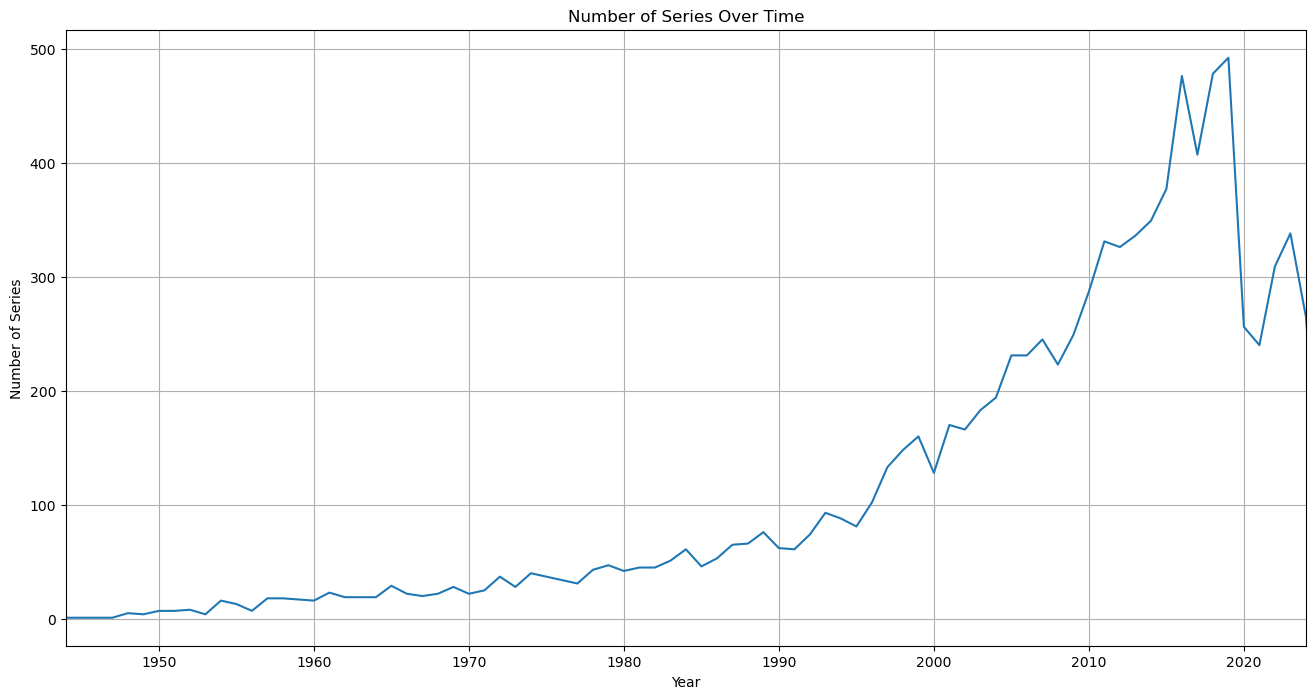

In [248]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_anyos, x="First Air Year", y="Series Count")
plt.title("Number of Series Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Series")
plt.grid(True)
plt.xlim([df_anyos["First Air Year"].min(), 2024])

plt.show()

In [249]:
df[df["First Air Year"] ==2024].shape[0]

265

In [250]:
# evolución del rating promedio con el tiempo
rating_anyo = df.groupby("First Air Year")["Rating"].mean().reset_index(name = "Promedio Rating")

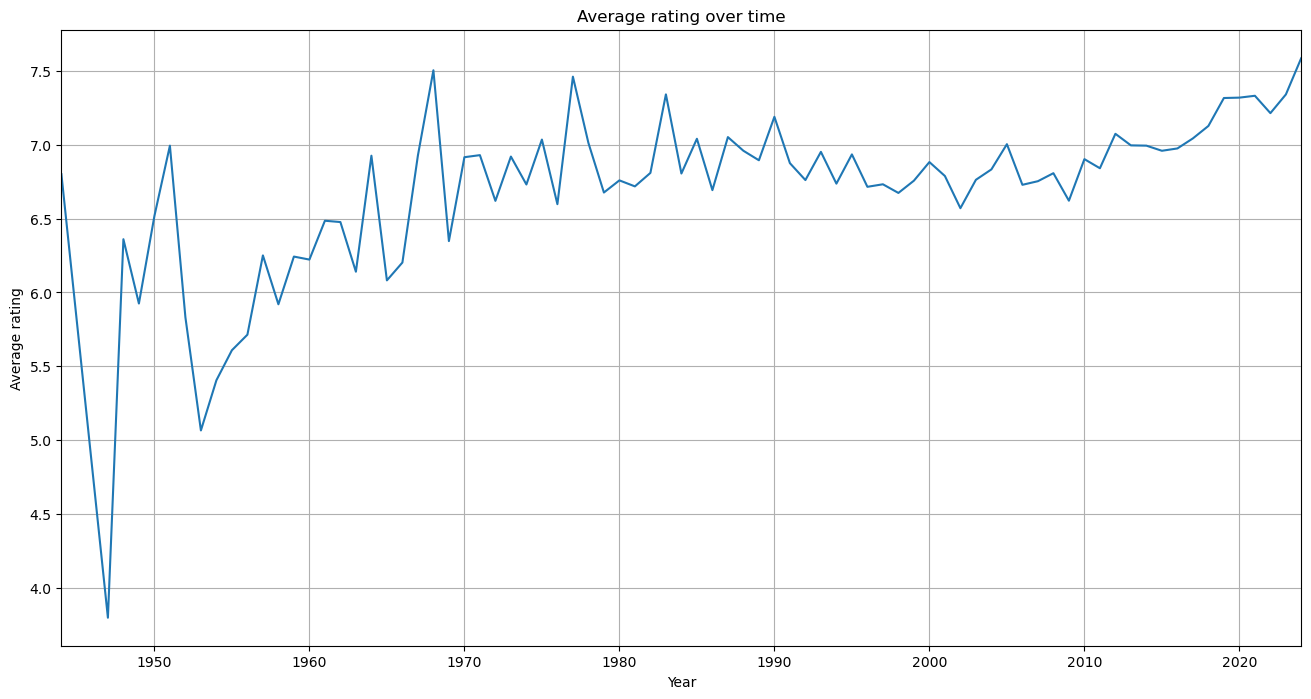

In [251]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=rating_anyo, x="First Air Year", y="Promedio Rating")
plt.title("Average rating over time")
plt.xlabel("Year")
plt.ylabel("Average rating")
plt.grid(True)
plt.xlim([df_anyos["First Air Year"].min(), 2024])

plt.show()

In [252]:
# evolución de los generos a lo largo de los años
# Lista de géneros únicos
generos = df_genero["Genero"].unique()
generos

array(['Entertainment', 'Drama', 'Comedy', 'Family', 'Action & Adventure',
       'Animation', 'Documentary'], dtype=object)

In [253]:
df_genero["First Air Year"] = df_genero["First Air Date"].dt.year

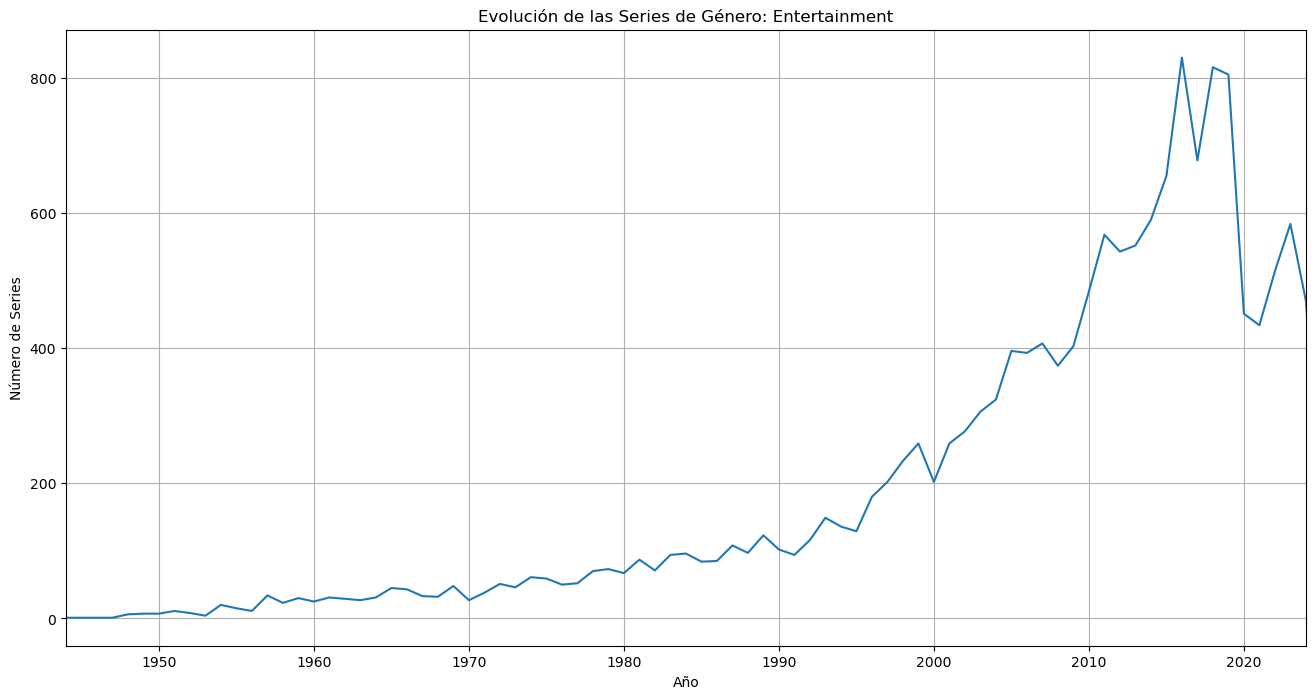

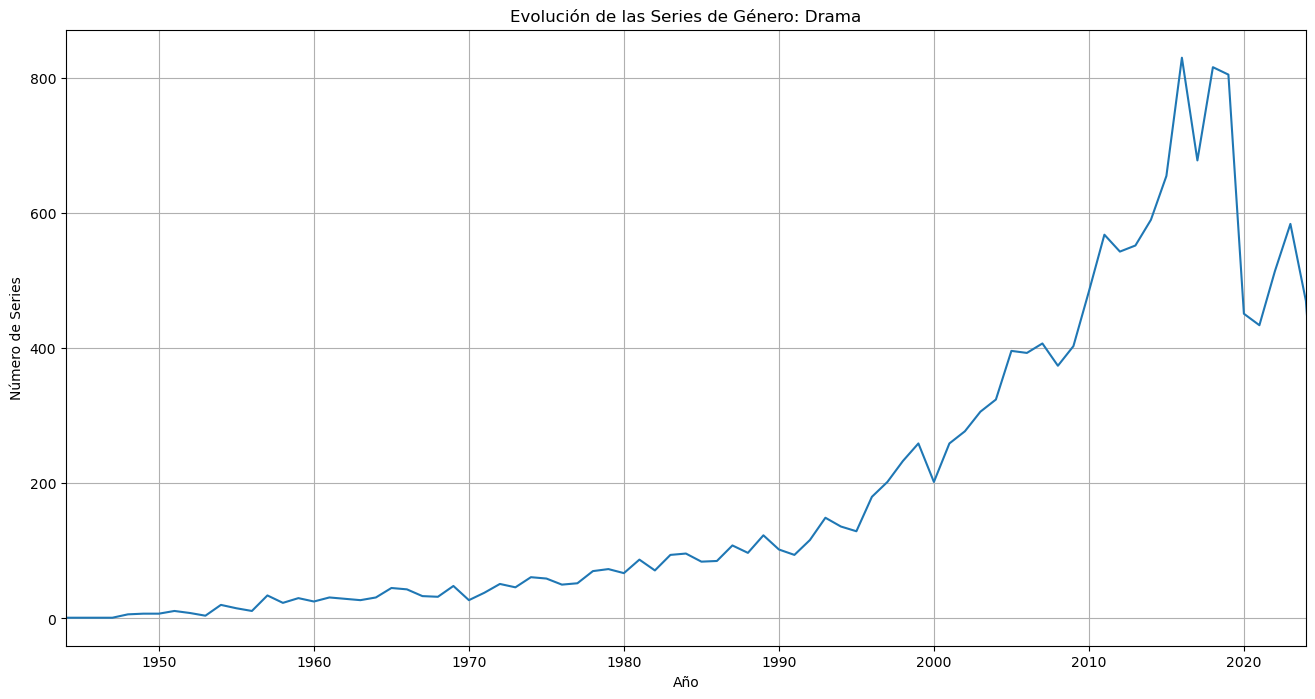

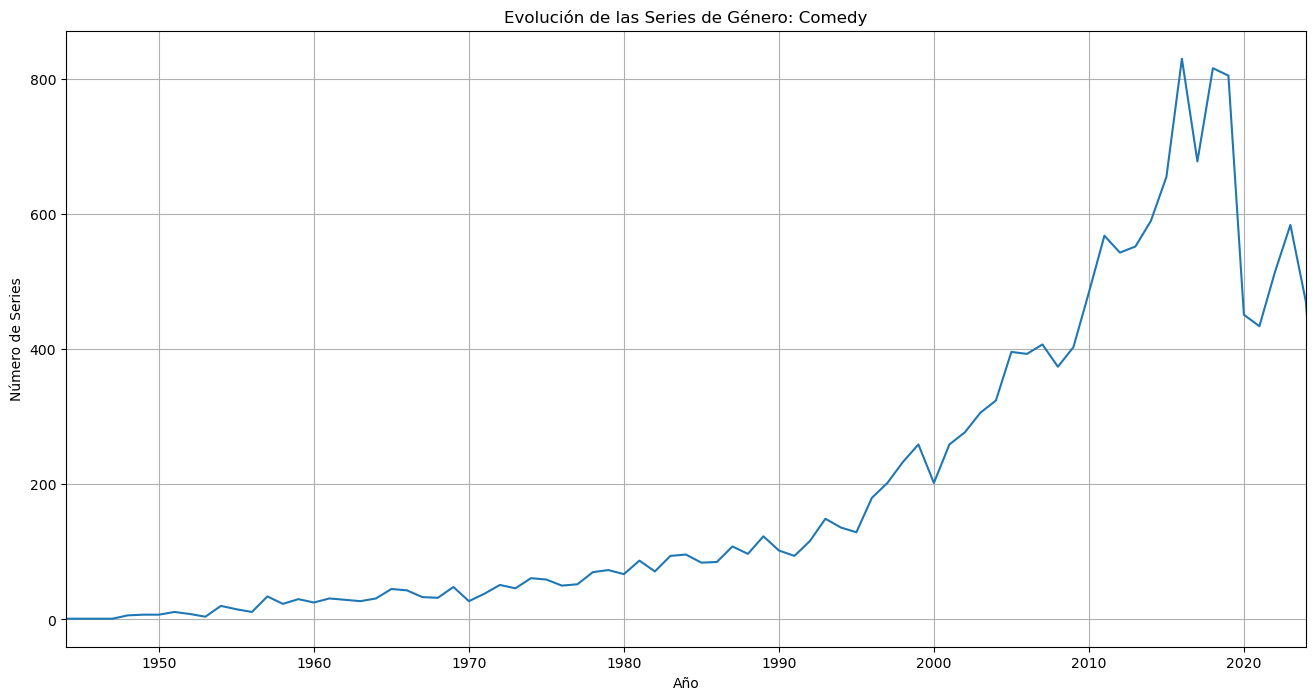

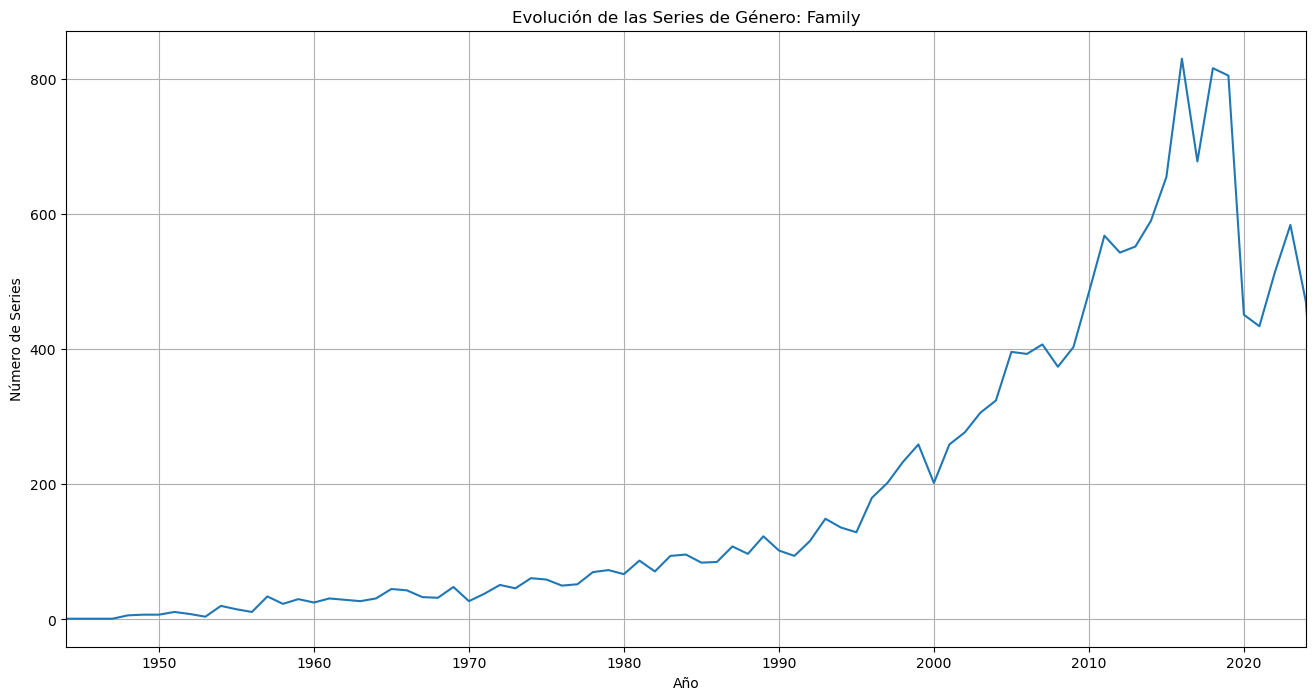

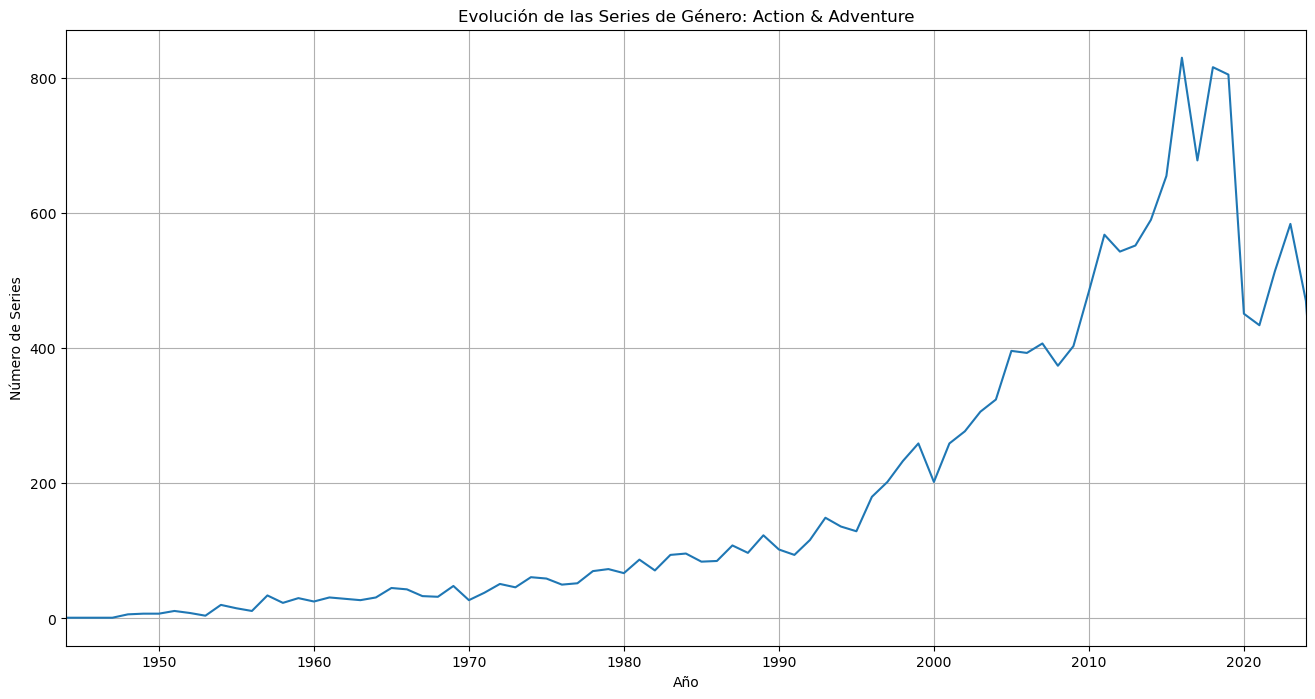

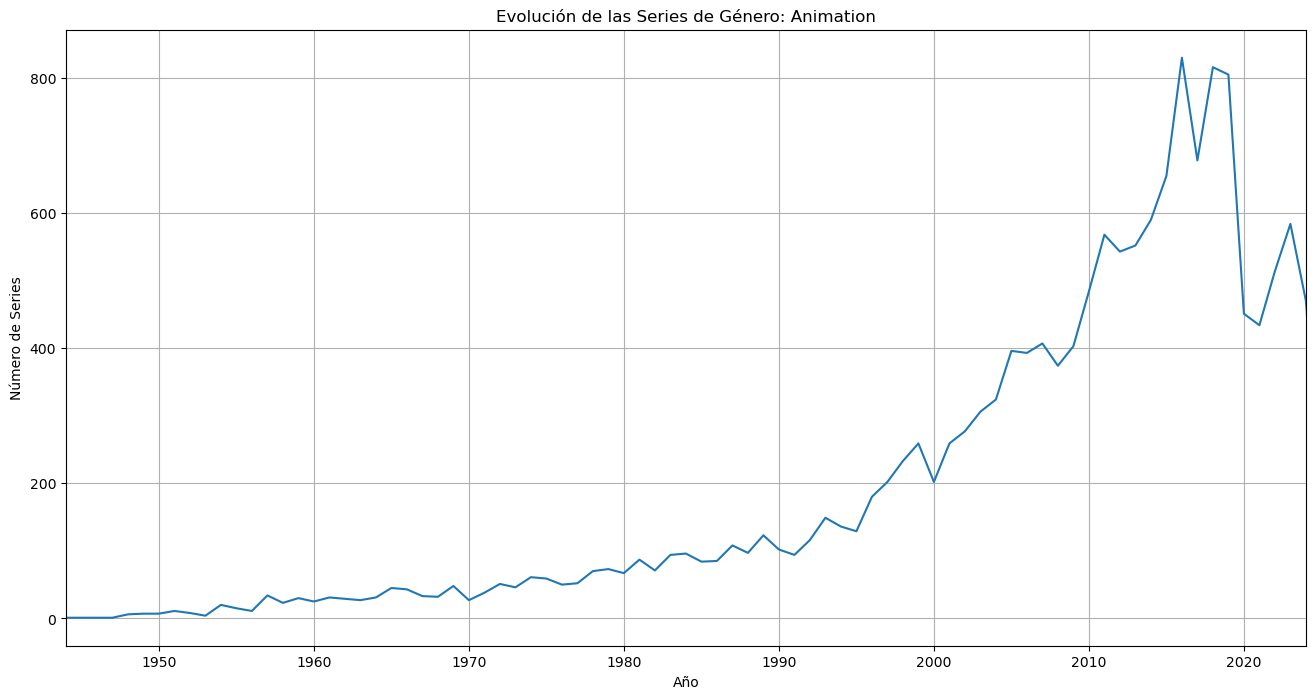

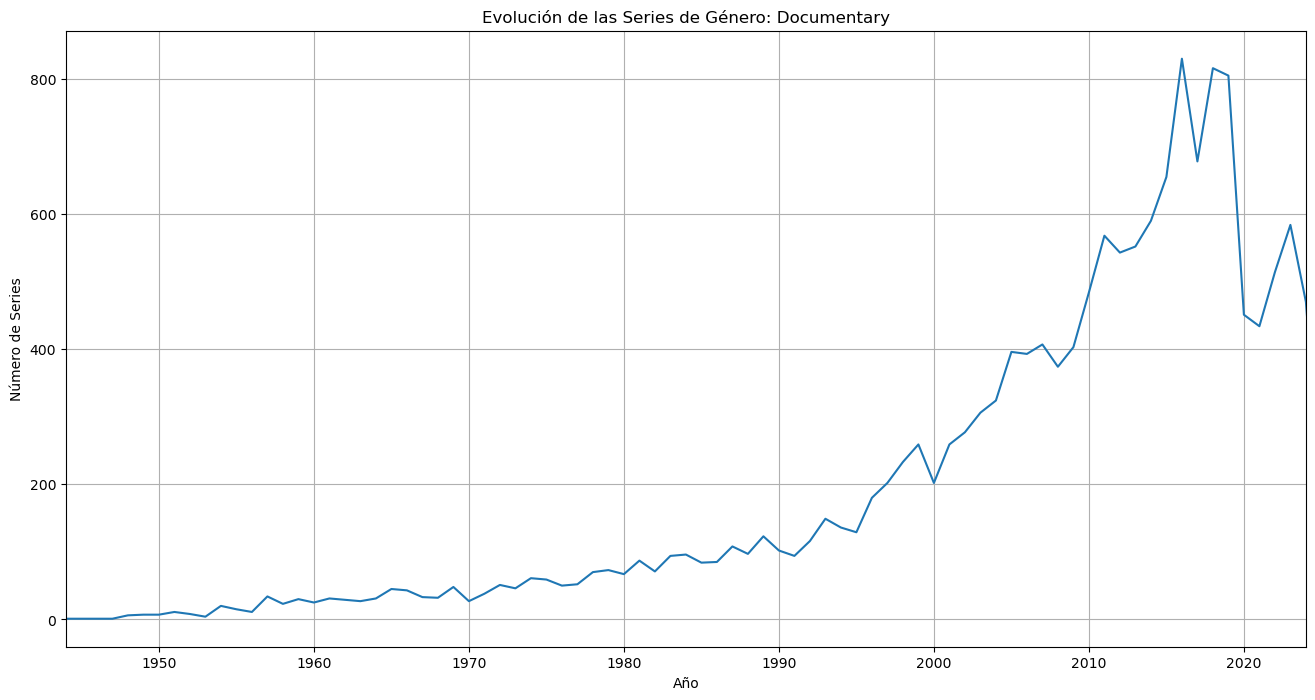

In [254]:
# Bucle para sacar el grafico de cada genero
for genero in generos:
    
    # Contar el número de series por año
    df_anyos = df_genero.groupby("First Air Year").size().reset_index(name="Numero de Series")
    
    plt.figure(figsize=(16, 8))
    sns.lineplot(data=df_anyos, x="First Air Year", y="Numero de Series")
    plt.title(f"Evolución de las Series de Género: {genero}")
    plt.xlabel("Año")
    plt.ylabel("Número de Series")
    plt.grid(True)
    
    # Limitar el gráfico para que no pase de 2024
    plt.xlim([df_genero["First Air Year"].min(), 2024])
    plt.show()

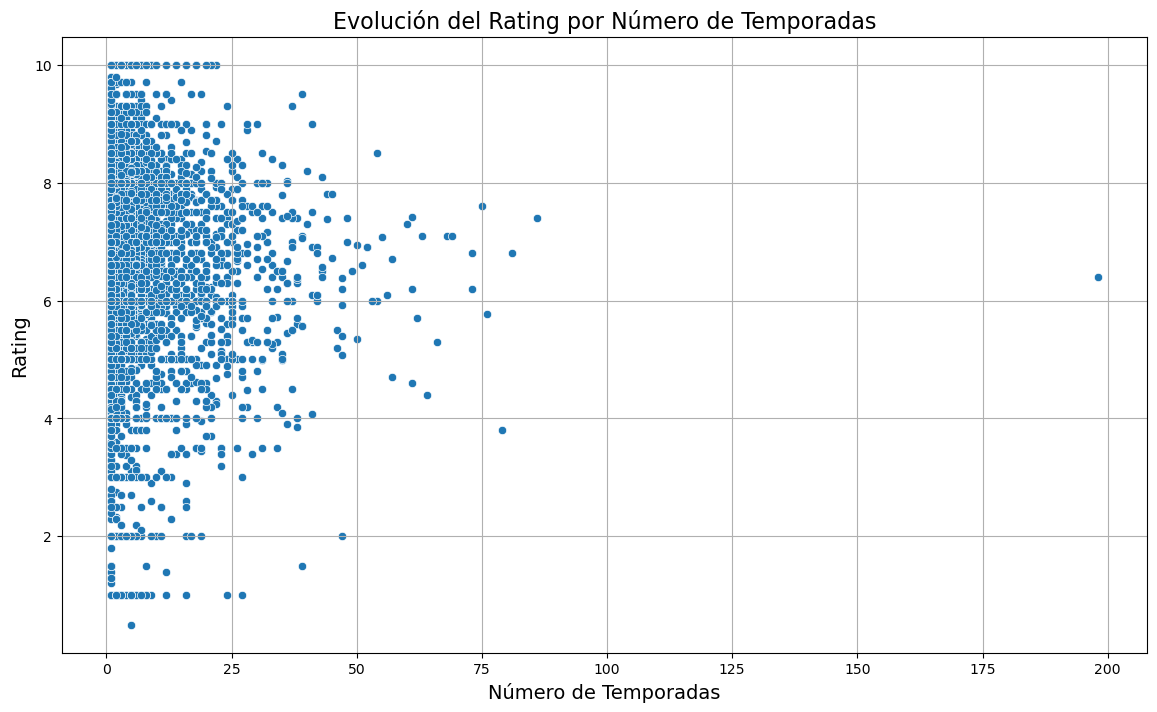

In [255]:
# Filtrar las series que tienen un número de temporadas y un rating disponible
df_temp = df.dropna(subset=["Rating", "Number of Season"])

# Crear un gráfico de dispersión para ver la relación entre el rating y el número de temporadas
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_temp, x="Number of Season", y="Rating")

# Agregar etiquetas y título
plt.title("Evolución del Rating por Número de Temporadas", fontsize=16)
plt.xlabel("Número de Temporadas", fontsize=14)
plt.ylabel("Rating", fontsize=14)
plt.grid(True)
plt.show()